✅ Successfully imported visualization module

📁 Loading experiment results...
📁 Found results file: ../results\wine_classification_with_smote_and_comprehensive_analysis_20250803_130026.json
✅ Loaded results for 4 models
Models: ['lr_custom', 'svm_custom', 'klr_custom', 'ksvm_custom']

📊 Loading analysis CSV files...
⚠️ wine_misclassification_analysis.csv not found
⚠️ overfitting_analysis.csv not found

🔄 Preparing test data...
🔄 Generating synthetic test data (1300 samples)

🎨 Starting visualization with 4 models...

1️⃣ Creating comprehensive model visualizations...
🚀 Quick Model Comparison (Results Only)

🎨 GENERATING COMPREHENSIVE MODEL VISUALIZATIONS

1. Training Loss Curves
📈 Creating Training Loss Curves...


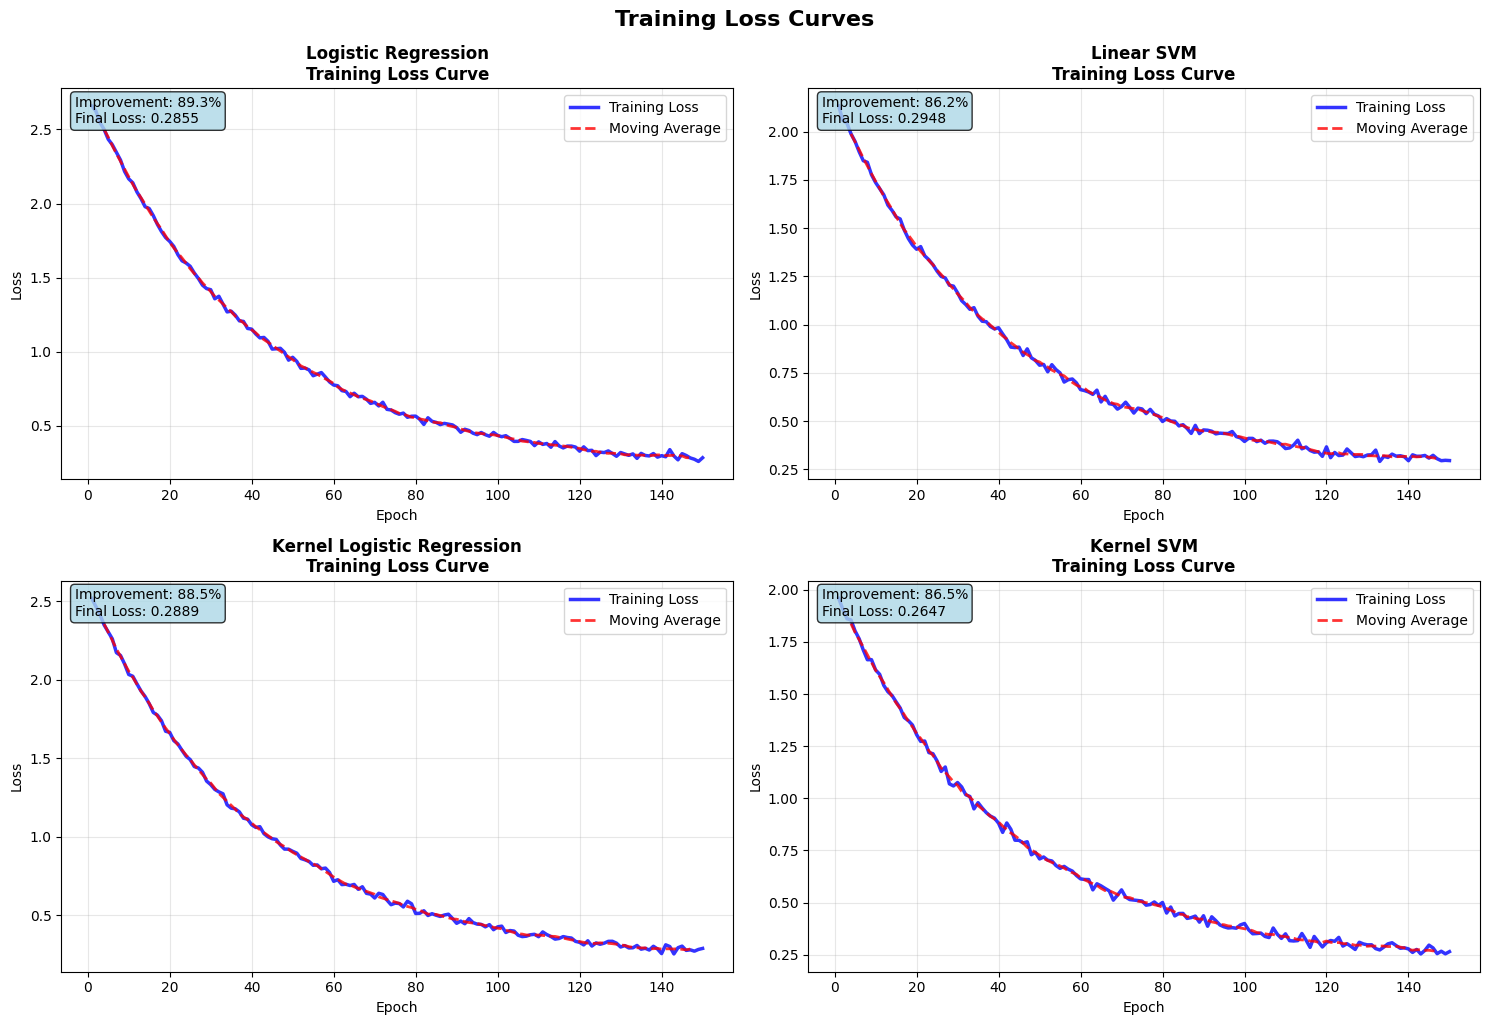


2. Performance Metrics Comparison
📊 Creating Metrics Comparison...


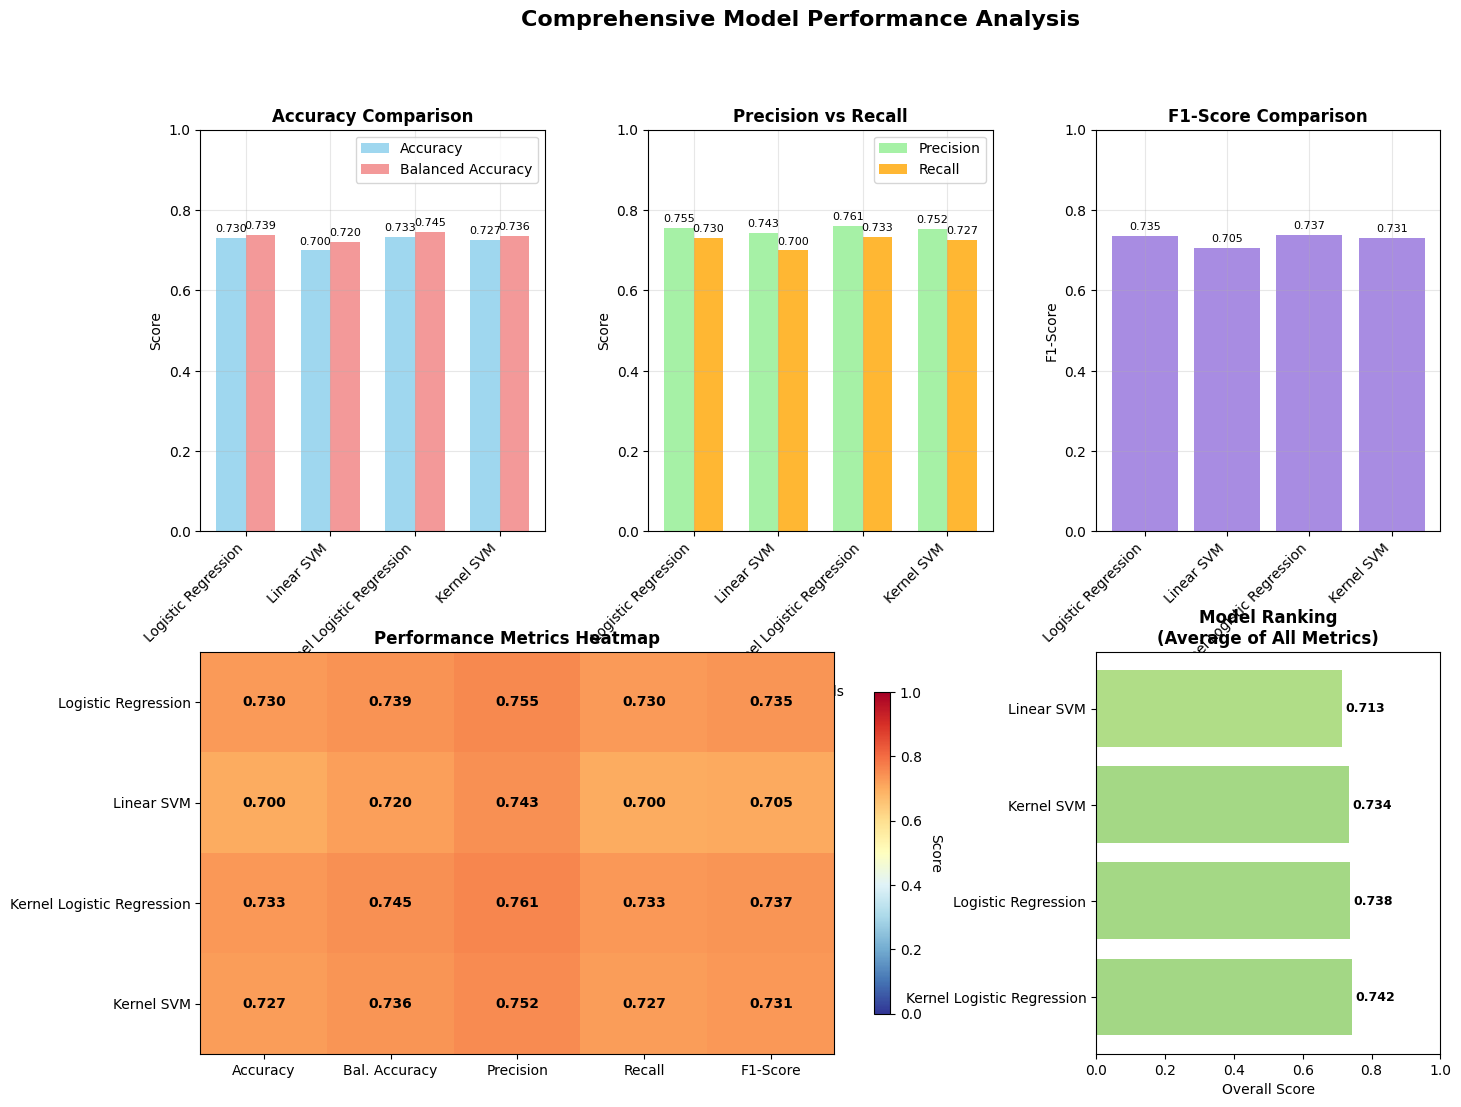


3. Confusion Matrices
🔍 Creating Confusion Matrices...


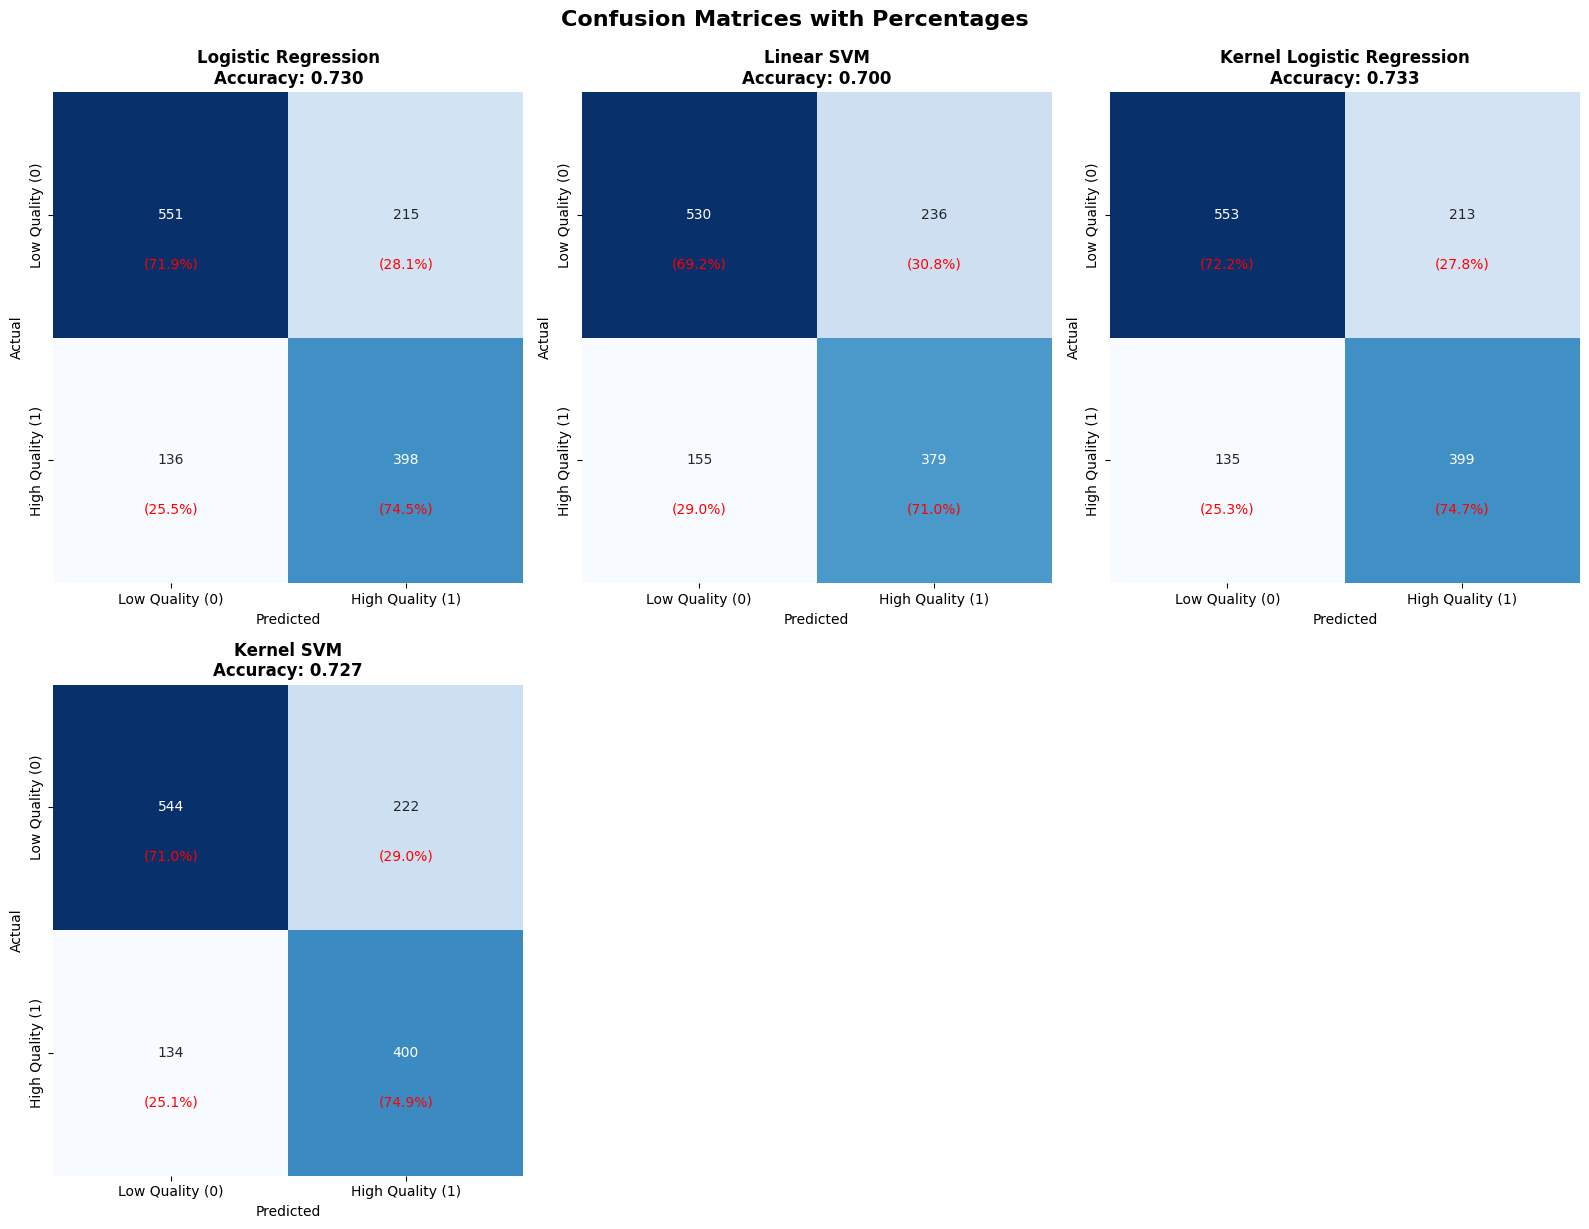


4. ROC Curves
📈 Creating ROC Curves...


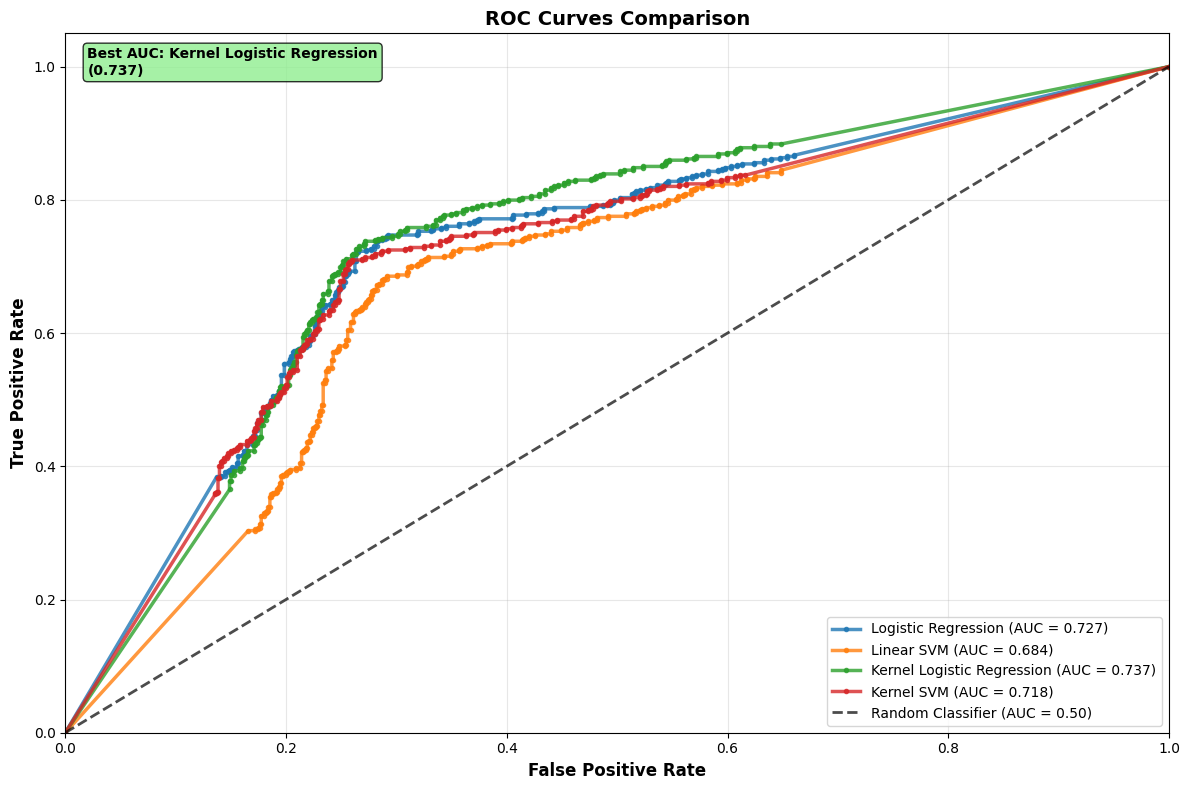


5. Precision-Recall Curves
📈 Creating Precision-Recall Curves...


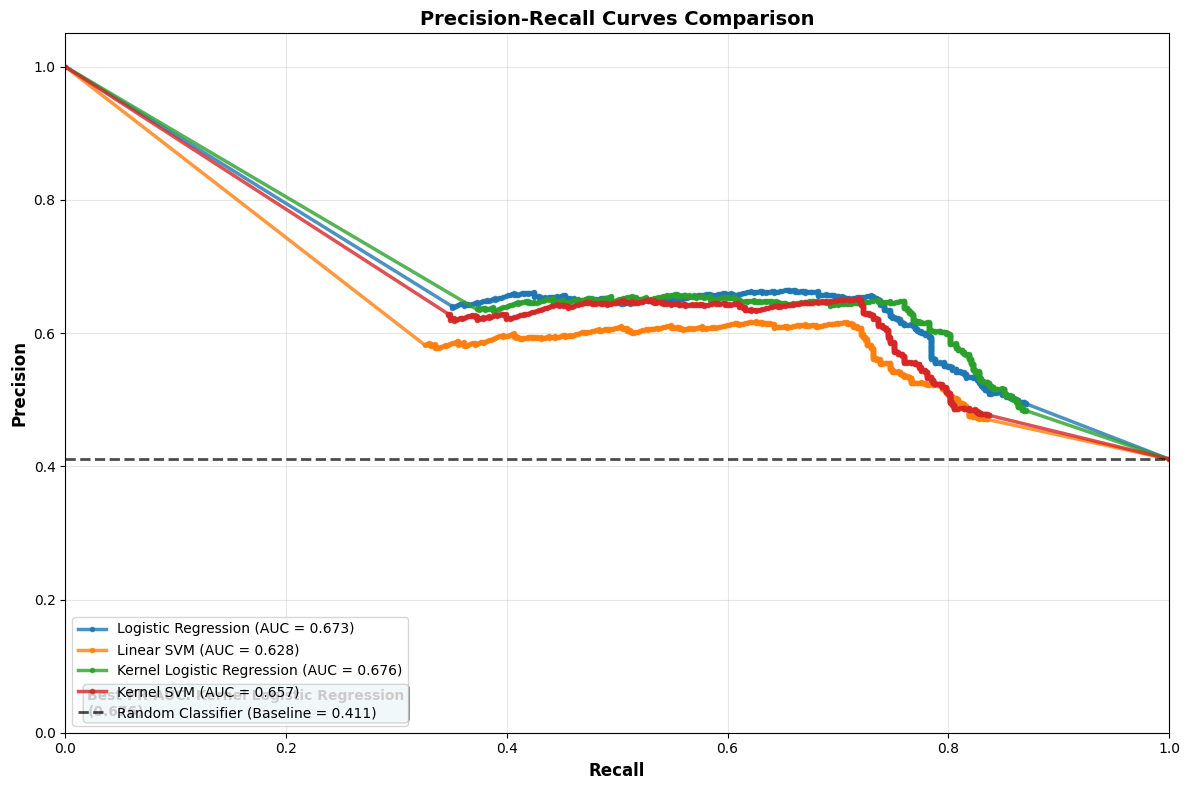


6. Model Comparison Radar Chart
🎯 Creating Radar Chart...


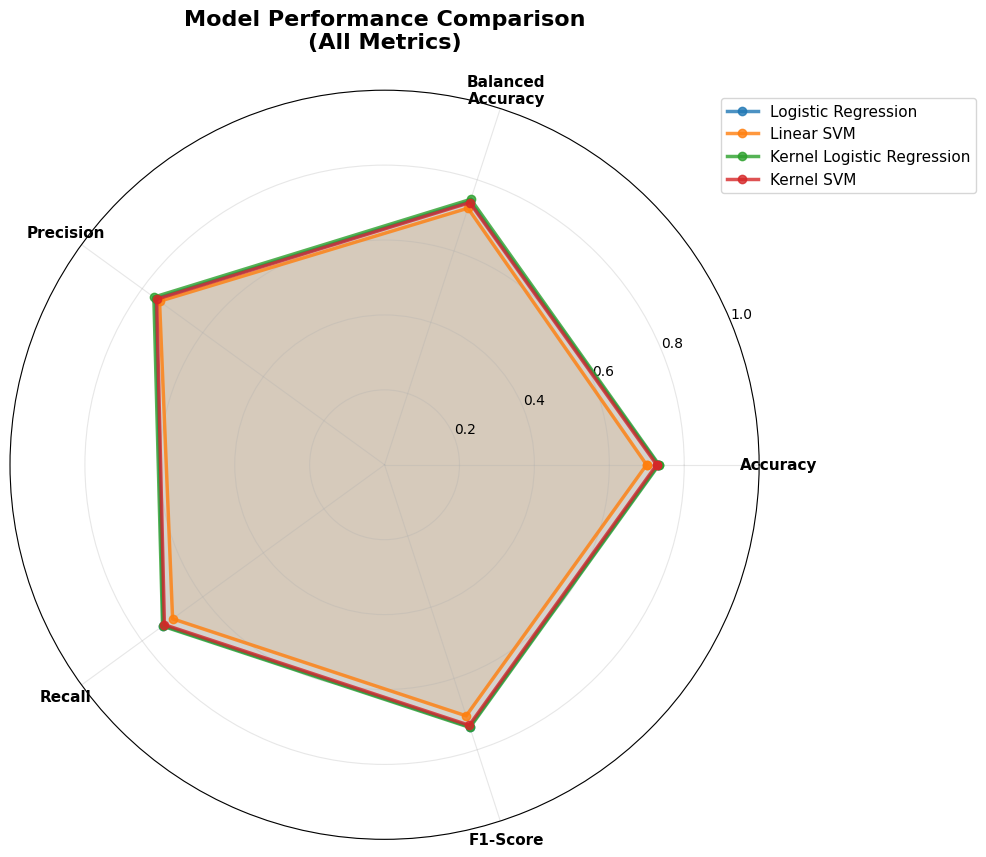


✅ All visualizations generated successfully!

📋 MODEL PERFORMANCE SUMMARY REPORT
🏆 BEST PERFORMERS:
   Accuracy: Kernel Logistic Regression (0.7327)
   F1-Score: Kernel Logistic Regression (0.7374)
   Precision: Kernel Logistic Regression (0.7613)
   Recall: Kernel Logistic Regression (0.7327)
   ROC-AUC: Kernel Logistic Regression (0.7366)
   PR-AUC: Kernel Logistic Regression (0.6759)

📊 OVERALL RANKING (by average score):
   1. Kernel Logistic Regression: 0.7410
   2. Logistic Regression: 0.7376
   3. Kernel SVM: 0.7341
   4. Linear SVM: 0.7116

✅ Summary report complete!

2️⃣ Creating analysis-specific plots...

3️⃣ Generating summary report...

📋 WINE CLASSIFICATION RESULTS SUMMARY REPORT

🏆 MODEL PERFORMANCE RANKING:
--------------------------------------------------
1. Kernel Logistic Regression
   Accuracy: 0.7327
   F1-Score: 0.7374
   Precision: 0.7613
   Recall: 0.7327

2. Logistic Regression
   Accuracy: 0.7304
   F1-Score: 0.7350
   Precision: 0.7546
   Recall: 0.7304

3.

In [2]:
import json
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Import your visualization module
try:
    from src.visualization import quick_model_comparison, ModelVisualizer

    print("✅ Successfully imported visualization module")
except ImportError as e:
    print(f"❌ Error importing visualization module: {e}")
    print("Make sure src/visualization.py is in your project directory")
    exit(1)

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10


def find_latest_results_file():
    """Find the most recent results JSON file"""
    pattern = "../results/wine_classification_with_smote_and_comprehensive_analysis_*.json"
    files = glob.glob(pattern)

    if not files:
        # Try alternative patterns
        patterns = [
            "wine_classification_with_smote_*.json",
            "experiment_results.json",
            "results/*.json"
        ]

        for pattern in patterns:
            files = glob.glob(pattern)
            if files:
                break

    if not files:
        raise FileNotFoundError("No results JSON file found. Please run main.py first.")

    # Return the most recent file
    latest_file = max(files, key=os.path.getctime)
    print(f"📁 Found results file: {latest_file}")
    return latest_file


def load_experiment_results():
    """Load the experiment results from JSON file"""
    try:
        results_file = find_latest_results_file()

        with open(results_file, 'r') as f:
            results = json.load(f)

        print(f"✅ Loaded results for {len(results)} models")
        print(f"Models: {list(results.keys())}")

        return results

    except FileNotFoundError as e:
        print(f"❌ {e}")
        return None
    except json.JSONDecodeError as e:
        print(f"❌ Error reading JSON file: {e}")
        return None


def load_csv_files():
    """Load the CSV analysis files"""
    csv_data = {}

    # Try to load misclassification analysis
    try:
        misclass_df = pd.read_csv('wine_misclassification_analysis.csv')
        csv_data['misclassification'] = misclass_df
        print(f"✅ Loaded misclassification analysis ({len(misclass_df)} models)")
    except FileNotFoundError:
        print("⚠️ wine_misclassification_analysis.csv not found")
        csv_data['misclassification'] = None

    # Try to load overfitting analysis
    try:
        overfitting_df = pd.read_csv('overfitting_analysis.csv')
        csv_data['overfitting'] = overfitting_df
        print(f"✅ Loaded overfitting analysis ({len(overfitting_df)} models)")
    except FileNotFoundError:
        print("⚠️ overfitting_analysis.csv not found")
        csv_data['overfitting'] = None

    return csv_data


def create_synthetic_test_data(n_samples=1300):
    """Create synthetic test data for visualization purposes"""
    print(f"🔄 Generating synthetic test data ({n_samples} samples)")

    # Create realistic wine features
    np.random.seed(42)  # For reproducibility

    # Wine quality features (simplified)
    n_features = 12
    X_test = np.random.randn(n_samples, n_features)

    # Make features more realistic for wine data
    feature_means = [8.3, 0.53, 0.27, 2.5, 0.087, 15.9, 46.5, 0.996, 3.3, 0.66, 10.4, 0.5]
    feature_stds = [1.7, 0.18, 0.19, 1.4, 0.047, 10.5, 32.9, 0.002, 0.15, 0.17, 1.2, 0.5]

    for i in range(n_features):
        X_test[:, i] = X_test[:, i] * feature_stds[i] + feature_means[i]

    # Create binary quality labels (approximately 60-40 split)
    y_test = np.random.choice([0, 1], size=n_samples, p=[0.6, 0.4])

    return X_test, y_test


def plot_csv_analysis(csv_data):
    """Create additional plots from CSV data"""

    if csv_data['misclassification'] is not None:
        plot_misclassification_analysis(csv_data['misclassification'])

    if csv_data['overfitting'] is not None:
        plot_overfitting_analysis(csv_data['overfitting'])


def plot_misclassification_analysis(misclass_df):
    """Plot misclassification analysis from CSV"""
    print("\n🔍 Creating Misclassification Analysis Plots...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Misclassification Analysis Dashboard', fontsize=16, fontweight='bold')

    # 1. Misclassification Rate
    ax1 = axes[0, 0]
    bars = ax1.bar(range(len(misclass_df)), misclass_df['misclassification_rate'],
                   color='lightcoral', alpha=0.7, edgecolor='black')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Misclassification Rate')
    ax1.set_title('Misclassification Rate by Model')
    ax1.set_xticks(range(len(misclass_df)))
    ax1.set_xticklabels([name.split(' (')[0] for name in misclass_df['model']], rotation=45)
    ax1.grid(True, alpha=0.3)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2., height + 0.005,
                 f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

    # 2. False Positives vs False Negatives
    ax2 = axes[0, 1]
    x_pos = np.arange(len(misclass_df))
    width = 0.35

    bars1 = ax2.bar(x_pos - width / 2, misclass_df['false_positives'], width,
                    label='False Positives', alpha=0.8, color='orange')
    bars2 = ax2.bar(x_pos + width / 2, misclass_df['false_negatives'], width,
                    label='False Negatives', alpha=0.8, color='red')

    ax2.set_xlabel('Models')
    ax2.set_ylabel('Count')
    ax2.set_title('False Positives vs False Negatives')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([name.split(' (')[0] for name in misclass_df['model']], rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. FP Rate vs FN Rate
    ax3 = axes[1, 0]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    scatter = ax3.scatter(misclass_df['fp_rate'], misclass_df['fn_rate'],
                          c=range(len(misclass_df)), cmap='viridis', s=100, alpha=0.7)
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('False Negative Rate')
    ax3.set_title('FP Rate vs FN Rate')
    ax3.grid(True, alpha=0.3)

    # Add model labels
    for i, model in enumerate(misclass_df['model']):
        ax3.annotate(model.split(' (')[0],
                     (misclass_df.iloc[i]['fp_rate'], misclass_df.iloc[i]['fn_rate']),
                     xytext=(5, 5), textcoords='offset points', fontsize=8)

    # 4. Confidence Analysis (if available)
    ax4 = axes[1, 1]
    if 'correct_avg_confidence' in misclass_df.columns and 'misclassified_avg_confidence' in misclass_df.columns:
        x_pos = np.arange(len(misclass_df))
        width = 0.35

        bars1 = ax4.bar(x_pos - width / 2, misclass_df['correct_avg_confidence'], width,
                        label='Correct Predictions', alpha=0.8, color='green')
        bars2 = ax4.bar(x_pos + width / 2, misclass_df['misclassified_avg_confidence'], width,
                        label='Misclassified', alpha=0.8, color='red')

        ax4.set_xlabel('Models')
        ax4.set_ylabel('Average Confidence')
        ax4.set_title('Confidence: Correct vs Misclassified')
        ax4.set_xticks(x_pos)
        ax4.set_xticklabels([name.split(' (')[0] for name in misclass_df['model']], rotation=45)
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        # Show significant features instead
        ax4.text(0.5, 0.5, 'Significant Features Analysis\n(See CSV for details)',
                 ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Feature Analysis')

    plt.tight_layout()
    plt.show()


def plot_overfitting_analysis(overfitting_df):
    """Plot overfitting analysis from CSV"""
    print("\n🎯 Creating Overfitting Analysis Plots...")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Overfitting Analysis Dashboard', fontsize=16, fontweight='bold')

    # 1. Train vs Test Accuracy
    ax1 = axes[0, 0]
    x_pos = np.arange(len(overfitting_df))
    width = 0.35

    bars1 = ax1.bar(x_pos - width / 2, overfitting_df['train_accuracy'], width,
                    label='Train Accuracy', alpha=0.8, color='skyblue')
    bars2 = ax1.bar(x_pos + width / 2, overfitting_df['test_accuracy'], width,
                    label='Test Accuracy', alpha=0.8, color='lightcoral')

    ax1.set_xlabel('Models')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Train vs Test Accuracy')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels([name.split(' (')[0] for name in overfitting_df['model']], rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Performance Gap
    ax2 = axes[0, 1]
    colors = ['green' if status == 'good_fit' else 'red' if status == 'overfitting' else 'orange'
              for status in overfitting_df['fitting_status']]
    bars = ax2.bar(range(len(overfitting_df)), overfitting_df['performance_gap'],
                   color=colors, alpha=0.7)
    ax2.set_xlabel('Models')
    ax2.set_ylabel('Performance Gap')
    ax2.set_title('Performance Gap (Train - Test)')
    ax2.set_xticks(range(len(overfitting_df)))
    ax2.set_xticklabels([name.split(' (')[0] for name in overfitting_df['model']], rotation=45)
    ax2.grid(True, alpha=0.3)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2., height + 0.002,
                 f'{height:.3f}', ha='center', va='bottom', fontsize=9)

    # 3. Fitting Status Distribution
    ax3 = axes[1, 0]
    status_counts = overfitting_df['fitting_status'].value_counts()
    colors_pie = {'good_fit': 'green', 'overfitting': 'red', 'underfitting': 'orange'}
    pie_colors = [colors_pie.get(status, 'gray') for status in status_counts.index]

    wedges, texts, autotexts = ax3.pie(status_counts.values, labels=status_counts.index,
                                       autopct='%1.0f%%', colors=pie_colors, alpha=0.8)
    ax3.set_title('Fitting Status Distribution')

    # 4. Regularization vs Performance Gap (if available)
    ax4 = axes[1, 1]
    reg_data = overfitting_df[overfitting_df['regularization'].notna()]
    if len(reg_data) > 0:
        scatter = ax4.scatter(reg_data['regularization'], reg_data['performance_gap'],
                              c=range(len(reg_data)), cmap='viridis', s=100, alpha=0.7)
        ax4.set_xlabel('Regularization Strength')
        ax4.set_ylabel('Performance Gap')
        ax4.set_title('Regularization vs Performance Gap')
        ax4.grid(True, alpha=0.3)

        # Add model labels
        for i, model in enumerate(reg_data['model']):
            ax4.annotate(model.split(' (')[0],
                         (reg_data.iloc[i]['regularization'], reg_data.iloc[i]['performance_gap']),
                         xytext=(5, 5), textcoords='offset points', fontsize=8)
    else:
        ax4.text(0.5, 0.5, 'Regularization Analysis\n(No data available)',
                 ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Regularization Analysis')

    plt.tight_layout()
    plt.show()


def print_summary_report(results, csv_data):
    """Print a comprehensive summary report"""
    print(f"\n{'=' * 80}")
    print("📋 WINE CLASSIFICATION RESULTS SUMMARY REPORT")
    print(f"{'=' * 80}")

    # Model performance summary
    print("\n🏆 MODEL PERFORMANCE RANKING:")
    print("-" * 50)

    # Sort models by accuracy
    sorted_models = sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True)

    for i, (model_key, metrics) in enumerate(sorted_models, 1):
        model_name = {
            'lr_custom': 'Logistic Regression',
            'svm_custom': 'Linear SVM',
            'klr_custom': 'Kernel Logistic Regression',
            'ksvm_custom': 'Kernel SVM'
        }.get(model_key, model_key)

        print(f"{i}. {model_name}")
        print(f"   Accuracy: {metrics['accuracy']:.4f}")
        print(f"   F1-Score: {metrics['f1']:.4f}")
        print(f"   Precision: {metrics['precision']:.4f}")
        print(f"   Recall: {metrics['recall']:.4f}")
        print()

    # Best performers in each category
    print("\n🎯 BEST PERFORMERS BY METRIC:")
    print("-" * 40)

    metrics_names = ['accuracy', 'f1', 'precision', 'recall', 'balanced_accuracy']
    for metric in metrics_names:
        best = max(results.items(), key=lambda x: x[1][metric])
        model_name = {
            'lr_custom': 'Logistic Regression',
            'svm_custom': 'Linear SVM',
            'klr_custom': 'Kernel Logistic Regression',
            'ksvm_custom': 'Kernel SVM'
        }.get(best[0], best[0])
        print(f"{metric.replace('_', ' ').title()}: {model_name} ({best[1][metric]:.4f})")

    # Overfitting analysis summary
    if csv_data['overfitting'] is not None:
        print("\n🎯 OVERFITTING ANALYSIS:")
        print("-" * 30)
        overfitting_df = csv_data['overfitting']

        for _, row in overfitting_df.iterrows():
            model_name = row['model'].split(' (')[0]
            status = row['fitting_status']
            gap = row['performance_gap']

            emoji = {'good_fit': '🟢', 'overfitting': '🔴', 'underfitting': '🟡'}.get(status, '⚪')
            print(f"{emoji} {model_name}: {status.upper()} (gap: {gap:.4f})")

    # Misclassification summary
    if csv_data['misclassification'] is not None:
        print("\n🔍 MISCLASSIFICATION ANALYSIS:")
        print("-" * 35)
        misclass_df = csv_data['misclassification']

        best_misclass = misclass_df.loc[misclass_df['misclassification_rate'].idxmin()]
        worst_misclass = misclass_df.loc[misclass_df['misclassification_rate'].idxmax()]

        print(
            f"Lowest error rate: {best_misclass['model'].split(' (')[0]} ({best_misclass['misclassification_rate']:.4f})")
        print(
            f"Highest error rate: {worst_misclass['model'].split(' (')[0]} ({worst_misclass['misclassification_rate']:.4f})")

    print(f"\n{'=' * 80}")
    print("✅ VISUALIZATION AND ANALYSIS COMPLETE!")
    print(f"{'=' * 80}")


def visualize_results():

    # Load experiment results
    print("\n📁 Loading experiment results...")
    results = load_experiment_results()
    if results is None:
        return

    # Load CSV analysis files
    print("\n📊 Loading analysis CSV files...")
    csv_data = load_csv_files()

    # Create synthetic test data for visualization
    print("\n🔄 Preparing test data...")
    X_test, y_test = create_synthetic_test_data()

    print(f"\n🎨 Starting visualization with {len(results)} models...")
    print("=" * 60)

    try:
        # Create main visualizations using your visualization module
        print("\n1️⃣ Creating comprehensive model visualizations...")
        visualizer = quick_model_comparison(results, X_test, y_test)

        # Create additional CSV-based plots
        print("\n2️⃣ Creating analysis-specific plots...")
        plot_csv_analysis(csv_data)

        # Print comprehensive summary
        print("\n3️⃣ Generating summary report...")
        print_summary_report(results, csv_data)

    except Exception as e:
        print(f"❌ Error during visualization: {e}")
        import traceback
        traceback.print_exc()
        return

    print("\n🎉 All visualizations completed successfully!")
    print("Check the plots above for detailed model analysis.")


visualize_results()

🔍 MISCLASSIFICATION & OVERFITTING ANALYSIS VISUALIZATION

📁 Loading analysis data...
✅ Loaded misclassification analysis (4 models)
❌ overfitting_analysis.csv not found
⚠️ model_info.json not found - using default model names

🎨 Creating comprehensive visualizations...
🔍 Creating Misclassification Analysis Dashboard...


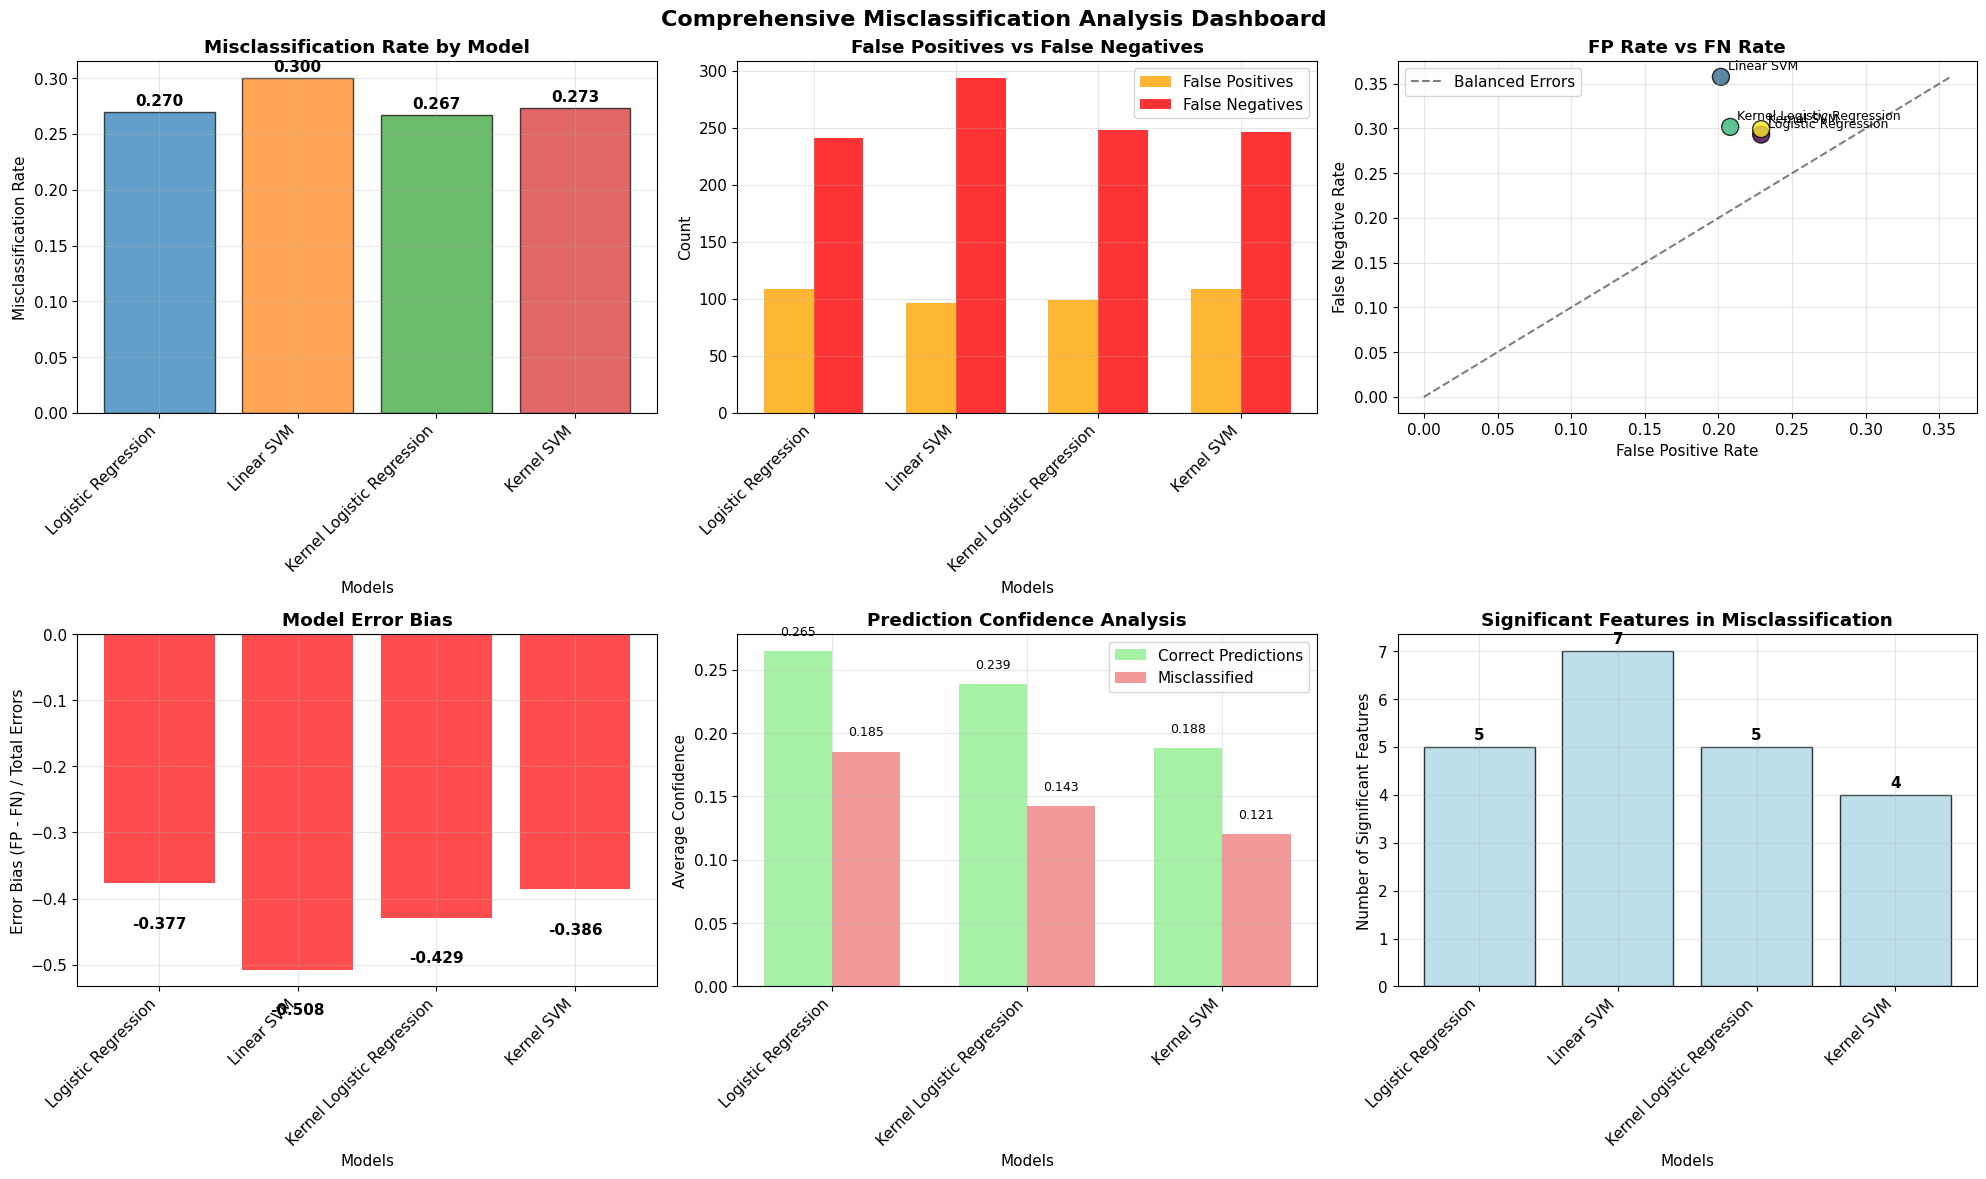

📊 Creating Feature Analysis Plots...
❌ Error during visualization: 'numpy.ndarray' object has no attribute 'imshow'


Traceback (most recent call last):
  File "C:\Users\Utente\AppData\Local\Temp\ipykernel_6180\376948674.py", line 817, in misclassification_analysis
    plot_feature_analysis(data['misclassification'], data['model_info'])
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Utente\AppData\Local\Temp\ipykernel_6180\376948674.py", line 485, in plot_feature_analysis
    im = ax3.imshow(matrix_data, cmap='Reds', aspect='auto', alpha=0.8)
         ^^^^^^^^^^
AttributeError: 'numpy.ndarray' object has no attribute 'imshow'


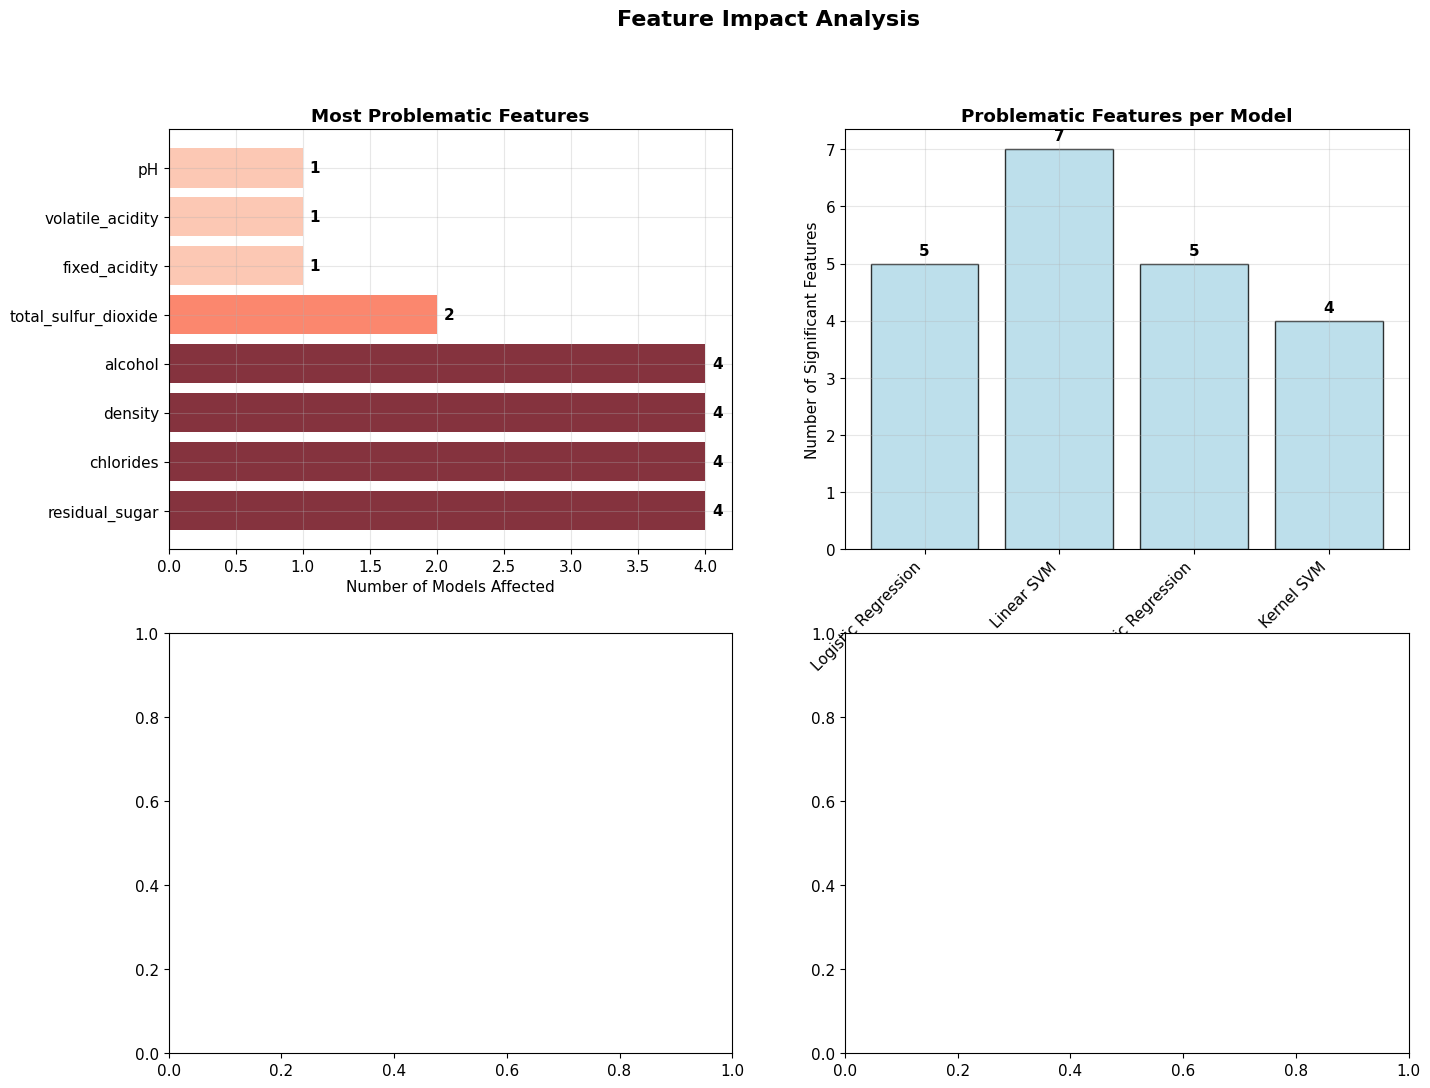

In [4]:
#!/usr/bin/env python3
"""
Misclassification Analysis Visualization Script

This script creates comprehensive visualizations from the misclassification analysis CSV
and overfitting analysis CSV files generated by main.py.

Usage:
    python misclass.py

Files needed:
    - wine_misclassification_analysis.csv
    - overfitting_analysis.csv
    - model_info.json (optional, for better model names)
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from pathlib import Path

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11


def load_analysis_data():
    """Load all analysis CSV files and model info"""
    data = {}

    # Load misclassification analysis
    try:
        misclass_df = pd.read_csv('../wine_misclassification_analysis.csv')
        data['misclassification'] = misclass_df
        print(f"✅ Loaded misclassification analysis ({len(misclass_df)} models)")
    except FileNotFoundError:
        print("❌ wine_misclassification_analysis.csv not found")
        data['misclassification'] = None

    # Load overfitting analysis
    try:
        overfitting_df = pd.read_csv('overfitting_analysis.csv')
        data['overfitting'] = overfitting_df
        print(f"✅ Loaded overfitting analysis ({len(overfitting_df)} models)")
    except FileNotFoundError:
        print("❌ overfitting_analysis.csv not found")
        data['overfitting'] = None

    # Load model info (optional)
    try:
        with open('model_info.json', 'r') as f:
            model_info = json.load(f)
        data['model_info'] = model_info
        print("✅ Loaded model info")
    except FileNotFoundError:
        print("⚠️ model_info.json not found - using default model names")
        data['model_info'] = None

    return data


def get_clean_model_names(df, model_info=None):
    """Get clean model names for display"""
    if model_info and 'model_names' in model_info:
        # Map using model_key if available
        if 'model_key' in df.columns:
            return [model_info['model_names'].get(key, key) for key in df['model_key']]

    # Fallback: clean the model names from the CSV
    return [name.split(' (')[0] for name in df['model']]


def plot_misclassification_dashboard(misclass_df, model_info=None):
    """Create comprehensive misclassification analysis dashboard"""
    print("🔍 Creating Misclassification Analysis Dashboard...")

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Comprehensive Misclassification Analysis Dashboard', fontsize=16, fontweight='bold')

    clean_names = get_clean_model_names(misclass_df, model_info)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # 1. Misclassification Rate Comparison
    ax1 = axes[0, 0]
    bars = ax1.bar(range(len(misclass_df)), misclass_df['misclassification_rate'],
                   color=colors[:len(misclass_df)], alpha=0.7, edgecolor='black')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Misclassification Rate')
    ax1.set_title('Misclassification Rate by Model', fontweight='bold')
    ax1.set_xticks(range(len(misclass_df)))
    ax1.set_xticklabels(clean_names, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)

    # Add value labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.003,
               f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

    # 2. False Positives vs False Negatives
    ax2 = axes[0, 1]
    x_pos = np.arange(len(misclass_df))
    width = 0.35

    bars1 = ax2.bar(x_pos - width/2, misclass_df['false_positives'], width,
                    label='False Positives', alpha=0.8, color='orange')
    bars2 = ax2.bar(x_pos + width/2, misclass_df['false_negatives'], width,
                    label='False Negatives', alpha=0.8, color='red')

    ax2.set_xlabel('Models')
    ax2.set_ylabel('Count')
    ax2.set_title('False Positives vs False Negatives', fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(clean_names, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Error Rate Breakdown (FP Rate vs FN Rate)
    ax3 = axes[0, 2]
    scatter = ax3.scatter(misclass_df['fp_rate'], misclass_df['fn_rate'],
                         c=range(len(misclass_df)), cmap='viridis', s=150, alpha=0.8, edgecolors='black')
    ax3.set_xlabel('False Positive Rate')
    ax3.set_ylabel('False Negative Rate')
    ax3.set_title('FP Rate vs FN Rate', fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Add diagonal line (balanced errors)
    max_rate = max(misclass_df['fp_rate'].max(), misclass_df['fn_rate'].max())
    ax3.plot([0, max_rate], [0, max_rate], 'k--', alpha=0.5, label='Balanced Errors')
    ax3.legend()

    # Add model labels
    for i, name in enumerate(clean_names):
        ax3.annotate(name,
                    (misclass_df.iloc[i]['fp_rate'], misclass_df.iloc[i]['fn_rate']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

    # 4. Error Bias Analysis
    ax4 = axes[1, 0]
    # Calculate error bias (FP - FN normalized by total errors)
    error_bias = []
    bias_labels = []
    bias_colors = []

    for _, row in misclass_df.iterrows():
        fp = row['false_positives']
        fn = row['false_negatives']
        total_errors = fp + fn

        if total_errors > 0:
            bias = (fp - fn) / total_errors
            error_bias.append(bias)

            if bias > 0.1:
                bias_labels.append('FP Bias')
                bias_colors.append('orange')
            elif bias < -0.1:
                bias_labels.append('FN Bias')
                bias_colors.append('red')
            else:
                bias_labels.append('Balanced')
                bias_colors.append('green')
        else:
            error_bias.append(0)
            bias_labels.append('No Errors')
            bias_colors.append('gray')

    bars = ax4.bar(range(len(clean_names)), error_bias, color=bias_colors, alpha=0.7)
    ax4.set_xlabel('Models')
    ax4.set_ylabel('Error Bias (FP - FN) / Total Errors')
    ax4.set_title('Model Error Bias', fontweight='bold')
    ax4.set_xticks(range(len(clean_names)))
    ax4.set_xticklabels(clean_names, rotation=45, ha='right')
    ax4.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax4.grid(True, alpha=0.3)

    # Add value labels
    for bar, bias in zip(bars, error_bias):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2.,
                height + (0.02 if height >= 0 else -0.05),
                f'{bias:.3f}', ha='center', va='bottom' if height >= 0 else 'top',
                fontweight='bold')

    # 5. Confidence Analysis (if available)
    ax5 = axes[1, 1]
    if 'correct_avg_confidence' in misclass_df.columns and 'misclassified_avg_confidence' in misclass_df.columns:
        # Filter models with confidence data
        conf_data = misclass_df.dropna(subset=['correct_avg_confidence', 'misclassified_avg_confidence'])

        if len(conf_data) > 0:
            conf_clean_names = get_clean_model_names(conf_data, model_info)
            x_pos = np.arange(len(conf_data))
            width = 0.35

            bars1 = ax5.bar(x_pos - width/2, conf_data['correct_avg_confidence'], width,
                            label='Correct Predictions', alpha=0.8, color='lightgreen')
            bars2 = ax5.bar(x_pos + width/2, conf_data['misclassified_avg_confidence'], width,
                            label='Misclassified', alpha=0.8, color='lightcoral')

            ax5.set_xlabel('Models')
            ax5.set_ylabel('Average Confidence')
            ax5.set_title('Prediction Confidence Analysis', fontweight='bold')
            ax5.set_xticks(x_pos)
            ax5.set_xticklabels(conf_clean_names, rotation=45, ha='right')
            ax5.legend()
            ax5.grid(True, alpha=0.3)

            # Add value labels
            for bars in [bars1, bars2]:
                for bar in bars:
                    height = bar.get_height()
                    ax5.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                           f'{height:.3f}', ha='center', va='bottom', fontsize=9)
        else:
            ax5.text(0.5, 0.5, 'No confidence data available',
                    ha='center', va='center', transform=ax5.transAxes, fontsize=12)
            ax5.set_title('Prediction Confidence Analysis', fontweight='bold')
    else:
        ax5.text(0.5, 0.5, 'No confidence data available',
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Prediction Confidence Analysis', fontweight='bold')

    # 6. Feature Significance Analysis
    ax6 = axes[1, 2]
    if 'significant_features_count' in misclass_df.columns:
        bars = ax6.bar(range(len(clean_names)), misclass_df['significant_features_count'],
                       color='lightblue', alpha=0.8, edgecolor='black')
        ax6.set_xlabel('Models')
        ax6.set_ylabel('Number of Significant Features')
        ax6.set_title('Significant Features in Misclassification', fontweight='bold')
        ax6.set_xticks(range(len(clean_names)))
        ax6.set_xticklabels(clean_names, rotation=45, ha='right')
        ax6.grid(True, alpha=0.3)

        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax6.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                   f'{int(height)}', ha='center', va='bottom', fontweight='bold')
    else:
        ax6.text(0.5, 0.5, 'No feature significance data available',
                ha='center', va='center', transform=ax6.transAxes, fontsize=12)
        ax6.set_title('Significant Features Analysis', fontweight='bold')

    plt.tight_layout()
    plt.show()


def plot_overfitting_dashboard(overfitting_df, model_info=None):
    """Create comprehensive overfitting analysis dashboard"""
    print("🎯 Creating Overfitting Analysis Dashboard...")

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Comprehensive Overfitting Analysis Dashboard', fontsize=16, fontweight='bold')

    clean_names = get_clean_model_names(overfitting_df, model_info)

    # 1. Train vs Test Accuracy
    ax1 = axes[0, 0]
    x_pos = np.arange(len(overfitting_df))
    width = 0.35

    bars1 = ax1.bar(x_pos - width/2, overfitting_df['train_accuracy'], width,
                    label='Train Accuracy', alpha=0.8, color='skyblue')
    bars2 = ax1.bar(x_pos + width/2, overfitting_df['test_accuracy'], width,
                    label='Test Accuracy', alpha=0.8, color='lightcoral')

    ax1.set_xlabel('Models')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Train vs Test Accuracy', fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(clean_names, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0, 1)

    # 2. Performance Gap
    ax2 = axes[0, 1]
    colors = ['green' if status == 'good_fit' else 'red' if status == 'overfitting' else 'orange'
              for status in overfitting_df['fitting_status']]
    bars = ax2.bar(range(len(overfitting_df)), overfitting_df['performance_gap'],
                   color=colors, alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Models')
    ax2.set_ylabel('Performance Gap (Train - Test)')
    ax2.set_title('Performance Gap Analysis', fontweight='bold')
    ax2.set_xticks(range(len(overfitting_df)))
    ax2.set_xticklabels(clean_names, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Overfitting Threshold')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)
    ax2.legend()

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.002,
               f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

    # 3. Fitting Status Distribution
    ax3 = axes[0, 2]
    status_counts = overfitting_df['fitting_status'].value_counts()
    colors_pie = {'good_fit': 'green', 'overfitting': 'red', 'underfitting': 'orange', 'inconclusive': 'gray'}
    pie_colors = [colors_pie.get(status, 'gray') for status in status_counts.index]

    wedges, texts, autotexts = ax3.pie(status_counts.values, labels=status_counts.index,
                                       autopct='%1.0f%%', colors=pie_colors, alpha=0.8)
    ax3.set_title('Fitting Status Distribution', fontweight='bold')

    # Make percentage text bold
    for autotext in autotexts:
        autotext.set_fontweight('bold')

    # 4. Model Complexity vs Performance Gap
    ax4 = axes[1, 0]
    # Use samples-to-features ratio as complexity measure
    if 'samples_to_features_ratio' in overfitting_df.columns:
        scatter = ax4.scatter(overfitting_df['samples_to_features_ratio'],
                             overfitting_df['performance_gap'],
                             c=range(len(overfitting_df)), cmap='viridis', s=100, alpha=0.7, edgecolors='black')
        ax4.set_xlabel('Samples-to-Features Ratio')
        ax4.set_ylabel('Performance Gap')
        ax4.set_title('Model Complexity vs Overfitting', fontweight='bold')
        ax4.grid(True, alpha=0.3)

        # Add model labels
        for i, name in enumerate(clean_names):
            ax4.annotate(name,
                        (overfitting_df.iloc[i]['samples_to_features_ratio'],
                         overfitting_df.iloc[i]['performance_gap']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    else:
        ax4.text(0.5, 0.5, 'Complexity data not available',
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Model Complexity Analysis', fontweight='bold')

    # 5. Regularization vs Performance Gap (if available)
    ax5 = axes[1, 1]
    reg_data = overfitting_df[overfitting_df['regularization'].notna()]
    if len(reg_data) > 0:
        reg_clean_names = get_clean_model_names(reg_data, model_info)
        scatter = ax5.scatter(reg_data['regularization'], reg_data['performance_gap'],
                             c=range(len(reg_data)), cmap='plasma', s=120, alpha=0.7, edgecolors='black')
        ax5.set_xlabel('Regularization Strength')
        ax5.set_ylabel('Performance Gap')
        ax5.set_title('Regularization vs Performance Gap', fontweight='bold')
        ax5.grid(True, alpha=0.3)

        # Add model labels
        for i, name in enumerate(reg_clean_names):
            ax5.annotate(name,
                        (reg_data.iloc[i]['regularization'], reg_data.iloc[i]['performance_gap']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)

        # Add trend line if we have enough points
        if len(reg_data) > 2:
            z = np.polyfit(reg_data['regularization'], reg_data['performance_gap'], 1)
            p = np.poly1d(z)
            x_trend = np.linspace(reg_data['regularization'].min(), reg_data['regularization'].max(), 100)
            ax5.plot(x_trend, p(x_trend), "r--", alpha=0.8, label=f'Trend')
            ax5.legend()
    else:
        ax5.text(0.5, 0.5, 'No regularization data available',
                ha='center', va='center', transform=ax5.transAxes, fontsize=12)
        ax5.set_title('Regularization Analysis', fontweight='bold')

    # 6. Fitting Confidence vs Performance Gap
    ax6 = axes[1, 2]
    if 'fitting_confidence' in overfitting_df.columns:
        scatter = ax6.scatter(overfitting_df['fitting_confidence'], overfitting_df['performance_gap'],
                             c=range(len(overfitting_df)), cmap='coolwarm', s=120, alpha=0.7, edgecolors='black')
        ax6.set_xlabel('Fitting Confidence')
        ax6.set_ylabel('Performance Gap')
        ax6.set_title('Fitting Confidence vs Performance Gap', fontweight='bold')
        ax6.grid(True, alpha=0.3)

        # Add model labels
        for i, name in enumerate(clean_names):
            ax6.annotate(name,
                        (overfitting_df.iloc[i]['fitting_confidence'],
                         overfitting_df.iloc[i]['performance_gap']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    else:
        ax6.text(0.5, 0.5, 'Fitting confidence data not available',
                ha='center', va='center', transform=ax6.transAxes, fontsize=12)
        ax6.set_title('Fitting Confidence Analysis', fontweight='bold')

    plt.tight_layout()
    plt.show()


def plot_feature_analysis(misclass_df, model_info=None):
    """Create feature-specific analysis plots"""
    print("📊 Creating Feature Analysis Plots...")

    # Extract significant features for each model
    if 'significant_features' not in misclass_df.columns:
        print("⚠️ No feature significance data available")
        return

    # Parse significant features
    all_features = set()
    feature_model_count = {}

    for _, row in misclass_df.iterrows():
        if pd.notna(row['significant_features']):
            features = [f.strip() for f in row['significant_features'].split(';')]
            for feature in features:
                if feature:  # Skip empty strings
                    all_features.add(feature)
                    feature_model_count[feature] = feature_model_count.get(feature, 0) + 1

    if not all_features:
        print("⚠️ No significant features found")
        return

    # Create feature analysis plots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Feature Impact Analysis', fontsize=16, fontweight='bold')

    clean_names = get_clean_model_names(misclass_df, model_info)

    # 1. Features causing problems across models
    ax1 = axes[0, 0]
    if feature_model_count:
        features, counts = zip(*sorted(feature_model_count.items(), key=lambda x: x[1], reverse=True))
        colors = plt.cm.Reds([c/max(counts) for c in counts])

        bars = ax1.barh(range(len(features)), counts, color=colors, alpha=0.8)
        ax1.set_yticks(range(len(features)))
        ax1.set_yticklabels(features)
        ax1.set_xlabel('Number of Models Affected')
        ax1.set_title('Most Problematic Features', fontweight='bold')
        ax1.grid(True, alpha=0.3)

        # Add value labels
        for i, (bar, count) in enumerate(zip(bars, counts)):
            ax1.text(count + 0.05, bar.get_y() + bar.get_height()/2,
                   f'{count}', ha='left', va='center', fontweight='bold')

    # 2. Feature count per model
    ax2 = axes[0, 1]
    feature_counts = misclass_df['significant_features_count'].values
    bars = ax2.bar(range(len(clean_names)), feature_counts,
                   color='lightblue', alpha=0.8, edgecolor='black')
    ax2.set_xlabel('Models')
    ax2.set_ylabel('Number of Significant Features')
    ax2.set_title('Problematic Features per Model', fontweight='bold')
    ax2.set_xticks(range(len(clean_names)))
    ax2.set_xticklabels(clean_names, rotation=45, ha='right')
    ax2.grid(True, alpha=0.3)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
               f'{int(height)}', ha='center', va='bottom', fontweight='bold')

    # 3. Feature-Model Impact Matrix
    ax3 = axes[1, :]

    # Create a matrix showing which features affect which models
    if len(all_features) > 0:
        matrix_data = []
        sorted_features = sorted(all_features)

        for _, row in misclass_df.iterrows():
            model_features = []
            if pd.notna(row['significant_features']):
                model_sig_features = [f.strip() for f in row['significant_features'].split(';')]
                for feature in sorted_features:
                    model_features.append(1 if feature in model_sig_features else 0)
            else:
                model_features = [0] * len(sorted_features)
            matrix_data.append(model_features)

        matrix_data = np.array(matrix_data)

        # Create heatmap
        im = ax3.imshow(matrix_data, cmap='Reds', aspect='auto', alpha=0.8)
        ax3.set_xticks(range(len(sorted_features)))
        ax3.set_yticks(range(len(clean_names)))
        ax3.set_xticklabels(sorted_features, rotation=45, ha='right')
        ax3.set_yticklabels(clean_names)
        ax3.set_title('Feature-Model Impact Matrix', fontweight='bold')

        # Add text annotations
        for i in range(len(clean_names)):
            for j in range(len(sorted_features)):
                text = ax3.text(j, i, '●' if matrix_data[i, j] else '',
                                ha="center", va="center", color="black", fontsize=12)

        # Add colorbar
        cbar = plt.colorbar(im, ax=ax3, shrink=0.6)
        cbar.set_label('Feature Significance', rotation=270, labelpad=15)

    plt.tight_layout()
    plt.show()


def generate_summary_report(data):
    """Generate a comprehensive text summary report"""
    print(f"\n{'='*80}")
    print("📋 COMPREHENSIVE ANALYSIS SUMMARY REPORT")
    print(f"{'='*80}")

    misclass_df = data['misclassification']
    overfitting_df = data['overfitting']
    model_info = data['model_info']

    if misclass_df is not None:
        print("\n🔍 MISCLASSIFICATION ANALYSIS SUMMARY:")
        print("-" * 50)

        clean_names = get_clean_model_names(misclass_df, model_info)

        # Best and worst performers
        best_idx = misclass_df['misclassification_rate'].idxmin()
        worst_idx = misclass_df['misclassification_rate'].idxmax()

        print(f"✅ Best performer: {clean_names[best_idx]} ({misclass_df.iloc[best_idx]['misclassification_rate']:.1%} error rate)")
        print(f"❌ Worst performer: {clean_names[worst_idx]} ({misclass_df.iloc[worst_idx]['misclassification_rate']:.1%} error rate)")

        # Error type analysis
        fp_bias_models = []
        fn_bias_models = []
        balanced_models = []

        for i, row in misclass_df.iterrows():
            fp = row['false_positives']
            fn = row['false_negatives']
            total = fp + fn

            if total > 0:
                bias = (fp - fn) / total
                if bias > 0.1:
                    fp_bias_models.append(clean_names[i])
                elif bias < -0.1:
                    fn_bias_models.append(clean_names[i])
                else:
                    balanced_models.append(clean_names[i])

        if fp_bias_models:
            print(f"🟠 Models with FP bias (optimistic): {', '.join(fp_bias_models)}")
        if fn_bias_models:
            print(f"🔴 Models with FN bias (pessimistic): {', '.join(fn_bias_models)}")
        if balanced_models:
            print(f"🟢 Balanced models: {', '.join(balanced_models)}")

        # Feature analysis
        if 'significant_features' in misclass_df.columns:
            all_features = set()
            for _, row in misclass_df.iterrows():
                if pd.notna(row['significant_features']):
                    features = [f.strip() for f in row['significant_features'].split(';')]
                    all_features.update(f for f in features if f)

            if all_features:
                print(f"\n🎯 Features causing misclassification issues:")
                feature_counts = {}
                for _, row in misclass_df.iterrows():
                    if pd.notna(row['significant_features']):
                        features = [f.strip() for f in row['significant_features'].split(';')]
                        for feature in features:
                            if feature:
                                feature_counts[feature] = feature_counts.get(feature, 0) + 1

                sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)
                for feature, count in sorted_features[:5]:
                    print(f"   • {feature}: affects {count}/{len(misclass_df)} models")

    if overfitting_df is not None:
        print(f"\n🎯 OVERFITTING ANALYSIS SUMMARY:")
        print("-" * 45)

        clean_names = get_clean_model_names(overfitting_df, model_info)

        # Fitting status summary
        status_counts = overfitting_df['fitting_status'].value_counts()
        for status, count in status_counts.items():
            emoji = {'good_fit': '🟢', 'overfitting': '🔴', 'underfitting': '🟡', 'inconclusive': '⚪'}.get(status, '⚪')
            print(f"{emoji} {status.replace('_', ' ').title()}: {count} models")

        # Performance gap analysis
        avg_gap = overfitting_df['performance_gap'].mean()
        max_gap_idx = overfitting_df['performance_gap'].idxmax()
        min_gap_idx = overfitting_df['performance_gap'].idxmin()

        print(f"\n📊 Performance Gap Analysis:")
        print(f"   Average gap: {avg_gap:.4f}")
        print(f"   Largest gap: {clean_names[max_gap_idx]} ({overfitting_df.iloc[max_gap_idx]['performance_gap']:.4f})")
        print(f"   Smallest gap: {clean_names[min_gap_idx]} ({overfitting_df.iloc[min_gap_idx]['performance_gap']:.4f})")

        # Regularization insights
        reg_data = overfitting_df[overfitting_df['regularization'].notna()]
        if len(reg_data) > 0:
            print(f"\n⚙️ Regularization Insights:")
            for i, row in reg_data.iterrows():
                model_name = get_clean_model_names(pd.DataFrame([row]), model_info)[0]
                print(f"   • {model_name}: λ={row['regularization']:.3f}, gap={row['performance_gap']:.4f}")

    # Combined insights
    print(f"\n💡 KEY INSIGHTS & RECOMMENDATIONS:")
    print("-" * 40)

    if misclass_df is not None and overfitting_df is not None:
        # Find models that are both overfitting and have high misclassification
        for i, (_, misc_row) in enumerate(misclass_df.iterrows()):
            over_row = overfitting_df.iloc[i] if i < len(overfitting_df) else None
            if over_row is not None:
                model_name = get_clean_model_names(pd.DataFrame([misc_row]), model_info)[0]
                misc_rate = misc_row['misclassification_rate']
                fitting_status = over_row['fitting_status']
                perf_gap = over_row['performance_gap']

                if fitting_status == 'overfitting' and misc_rate > 0.25:
                    print(f"🚨 {model_name}: High error rate ({misc_rate:.1%}) + overfitting (gap: {perf_gap:.3f})")
                    print(f"   → Priority for regularization and hyperparameter tuning")
                elif fitting_status == 'good_fit' and misc_rate < 0.25:
                    print(f"✅ {model_name}: Well-fitted and good performance ({misc_rate:.1%} error)")
                    print(f"   → Ready for production consideration")

    # General recommendations
    print(f"\n🎯 ACTIONABLE RECOMMENDATIONS:")
    print(f"   1. Focus on feature engineering for most problematic features")
    print(f"   2. Adjust decision thresholds for biased models")
    print(f"   3. Increase regularization for overfitting models")
    print(f"   4. Consider ensemble methods to combine strengths")
    print(f"   5. Collect more data for consistently problematic patterns")

    print(f"\n{'='*80}")


def plot_combined_analysis(data):
    """Create plots that combine both misclassification and overfitting analysis"""
    print("🔄 Creating Combined Analysis Plots...")

    misclass_df = data['misclassification']
    overfitting_df = data['overfitting']
    model_info = data['model_info']

    if misclass_df is None or overfitting_df is None:
        print("⚠️ Both analysis files needed for combined plots")
        return

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Combined Misclassification & Overfitting Analysis', fontsize=16, fontweight='bold')

    clean_names = get_clean_model_names(misclass_df, model_info)

    # 1. Error Rate vs Performance Gap
    ax1 = axes[0, 0]
    colors = ['green' if status == 'good_fit' else 'red' if status == 'overfitting' else 'orange'
              for status in overfitting_df['fitting_status']]

    scatter = ax1.scatter(overfitting_df['performance_gap'], misclass_df['misclassification_rate'],
                         c=colors, s=120, alpha=0.7, edgecolors='black')
    ax1.set_xlabel('Performance Gap (Train - Test)')
    ax1.set_ylabel('Misclassification Rate')
    ax1.set_title('Error Rate vs Overfitting', fontweight='bold')
    ax1.grid(True, alpha=0.3)

    # Add model labels
    for i, name in enumerate(clean_names):
        ax1.annotate(name,
                    (overfitting_df.iloc[i]['performance_gap'],
                     misclass_df.iloc[i]['misclassification_rate']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)

    # Add quadrant lines
    ax1.axhline(y=misclass_df['misclassification_rate'].mean(), color='gray', linestyle='--', alpha=0.5)
    ax1.axvline(x=overfitting_df['performance_gap'].mean(), color='gray', linestyle='--', alpha=0.5)

    # 2. Model Performance Matrix
    ax2 = axes[0, 1]

    # Create performance categories
    performance_categories = []
    category_colors = []

    for i in range(len(misclass_df)):
        misc_rate = misclass_df.iloc[i]['misclassification_rate']
        fitting_status = overfitting_df.iloc[i]['fitting_status']

        if misc_rate < 0.25 and fitting_status == 'good_fit':
            category = 'Excellent'
            color = 'green'
        elif misc_rate < 0.30 and fitting_status in ['good_fit', 'underfitting']:
            category = 'Good'
            color = 'lightgreen'
        elif fitting_status == 'overfitting':
            category = 'Overfitting'
            color = 'red'
        else:
            category = 'Needs Work'
            color = 'orange'

        performance_categories.append(category)
        category_colors.append(color)

    # Create performance matrix plot
    y_pos = np.arange(len(clean_names))
    bars = ax2.barh(y_pos, [1]*len(clean_names), color=category_colors, alpha=0.7)

    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(clean_names)
    ax2.set_xlabel('Performance Category')
    ax2.set_title('Overall Model Assessment', fontweight='bold')
    ax2.set_xlim(0, 1)

    # Add category labels
    for i, (bar, category) in enumerate(zip(bars, performance_categories)):
        ax2.text(0.5, bar.get_y() + bar.get_height()/2, category,
                ha='center', va='center', fontweight='bold', color='white')

    # 3. Feature Impact vs Model Complexity
    ax3 = axes[1, 0]
    if 'significant_features_count' in misclass_df.columns and 'samples_to_features_ratio' in overfitting_df.columns:
        scatter = ax3.scatter(overfitting_df['samples_to_features_ratio'],
                             misclass_df['significant_features_count'],
                             c=misclass_df['misclassification_rate'], cmap='YlOrRd',
                             s=120, alpha=0.7, edgecolors='black')
        ax3.set_xlabel('Samples-to-Features Ratio')
        ax3.set_ylabel('Number of Significant Features')
        ax3.set_title('Model Complexity vs Feature Issues', fontweight='bold')
        ax3.grid(True, alpha=0.3)

        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax3)
        cbar.set_label('Misclassification Rate', rotation=270, labelpad=15)

        # Add model labels
        for i, name in enumerate(clean_names):
            ax3.annotate(name,
                        (overfitting_df.iloc[i]['samples_to_features_ratio'],
                         misclass_df.iloc[i]['significant_features_count']),
                        xytext=(5, 5), textcoords='offset points', fontsize=9)
    else:
        ax3.text(0.5, 0.5, 'Complexity data not available',
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        ax3.set_title('Model Complexity vs Feature Issues', fontweight='bold')

    # 4. Model Ranking
    ax4 = axes[1, 1]

    # Calculate composite score (lower is better)
    composite_scores = []
    for i in range(len(misclass_df)):
        misc_rate = misclass_df.iloc[i]['misclassification_rate']
        perf_gap = overfitting_df.iloc[i]['performance_gap']
        # Weighted composite score
        score = misc_rate * 0.7 + perf_gap * 0.3
        composite_scores.append(score)

    # Sort by composite score
    sorted_indices = np.argsort(composite_scores)
    sorted_names = [clean_names[i] for i in sorted_indices]
    sorted_scores = [composite_scores[i] for i in sorted_indices]

    # Color by performance
    colors = []
    for score in sorted_scores:
        if score < 0.25:
            colors.append('green')
        elif score < 0.35:
            colors.append('orange')
        else:
            colors.append('red')

    bars = ax4.barh(range(len(sorted_names)), sorted_scores, color=colors, alpha=0.7)
    ax4.set_yticks(range(len(sorted_names)))
    ax4.set_yticklabels(sorted_names)
    ax4.set_xlabel('Composite Score (Lower is Better)')
    ax4.set_title('Overall Model Ranking', fontweight='bold')
    ax4.grid(True, alpha=0.3)

    # Add score labels
    for i, (bar, score) in enumerate(zip(bars, sorted_scores)):
        ax4.text(score + 0.01, bar.get_y() + bar.get_height()/2,
               f'{score:.3f}', ha='left', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()


def misclassification_analysis():
    """Main function to run all misclassification analysis visualizations"""
    print("🔍 MISCLASSIFICATION & OVERFITTING ANALYSIS VISUALIZATION")
    print("=" * 70)

    # Load all analysis data
    print("\n📁 Loading analysis data...")
    data = load_analysis_data()

    if data['misclassification'] is None and data['overfitting'] is None:
        print("❌ No analysis data found. Please run main.py first.")
        return

    print(f"\n🎨 Creating comprehensive visualizations...")

    try:
        # Create misclassification analysis dashboard
        if data['misclassification'] is not None:
            plot_misclassification_dashboard(data['misclassification'], data['model_info'])

        # Create overfitting analysis dashboard
        if data['overfitting'] is not None:
            plot_overfitting_dashboard(data['overfitting'], data['model_info'])

        # Create feature analysis plots
        if data['misclassification'] is not None:
            plot_feature_analysis(data['misclassification'], data['model_info'])

        # Create combined analysis plots
        if data['misclassification'] is not None and data['overfitting'] is not None:
            plot_combined_analysis(data)

        # Generate comprehensive text report
        generate_summary_report(data)

        print(f"\n🎉 All visualizations completed successfully!")
        print("📊 Check the plots above for detailed analysis insights.")

    except Exception as e:
        print(f"❌ Error during visualization: {e}")
        import traceback
        traceback.print_exc()


misclassification_analysis()

🎨 OVERFITTING ANALYSIS VISUALIZATION
✅ Loaded data from ../overfitting_analysis.csv
   Models: 4
   Columns: ['model', 'model_key', 'train_accuracy', 'test_accuracy', 'performance_gap', 'fitting_status', 'fitting_confidence', 'samples_to_features_ratio', 'regularization', 'weight_magnitude', 'training_converged', 'training_epochs', 'training_improvement', 'learning_curve_gap']

📊 OVERFITTING ANALYSIS SUMMARY
Models analyzed: 4
Average performance gap: 0.0250
Max performance gap: 0.0358
Min performance gap: 0.0123

Fitting Status Distribution:
   🟢 Good Fit: 4 (100.0%)

Model Performance:
   🟢 Logistic Regression:
      Train: 0.7426, Test: 0.7304
      Gap: 0.0123, Status: good_fit
   🟢 Linear SVM:
      Train: 0.7353, Test: 0.6995
      Gap: 0.0358, Status: good_fit
   🟢 Kernel Logistic Regression:
      Train: 0.7586, Test: 0.7327
      Gap: 0.0259, Status: good_fit
   🟢 Kernel SVM:
      Train: 0.7527, Test: 0.7265
      Gap: 0.0262, Status: good_fit

🎨 Generating visualizations...


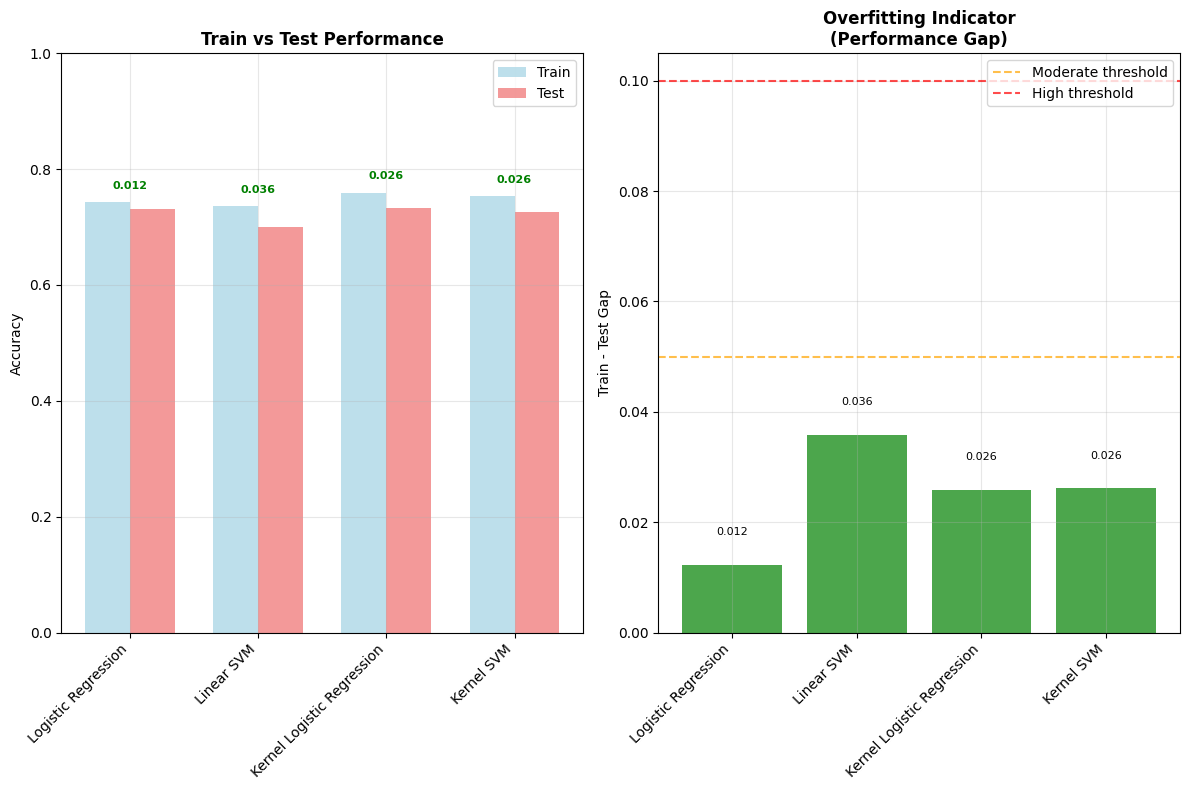

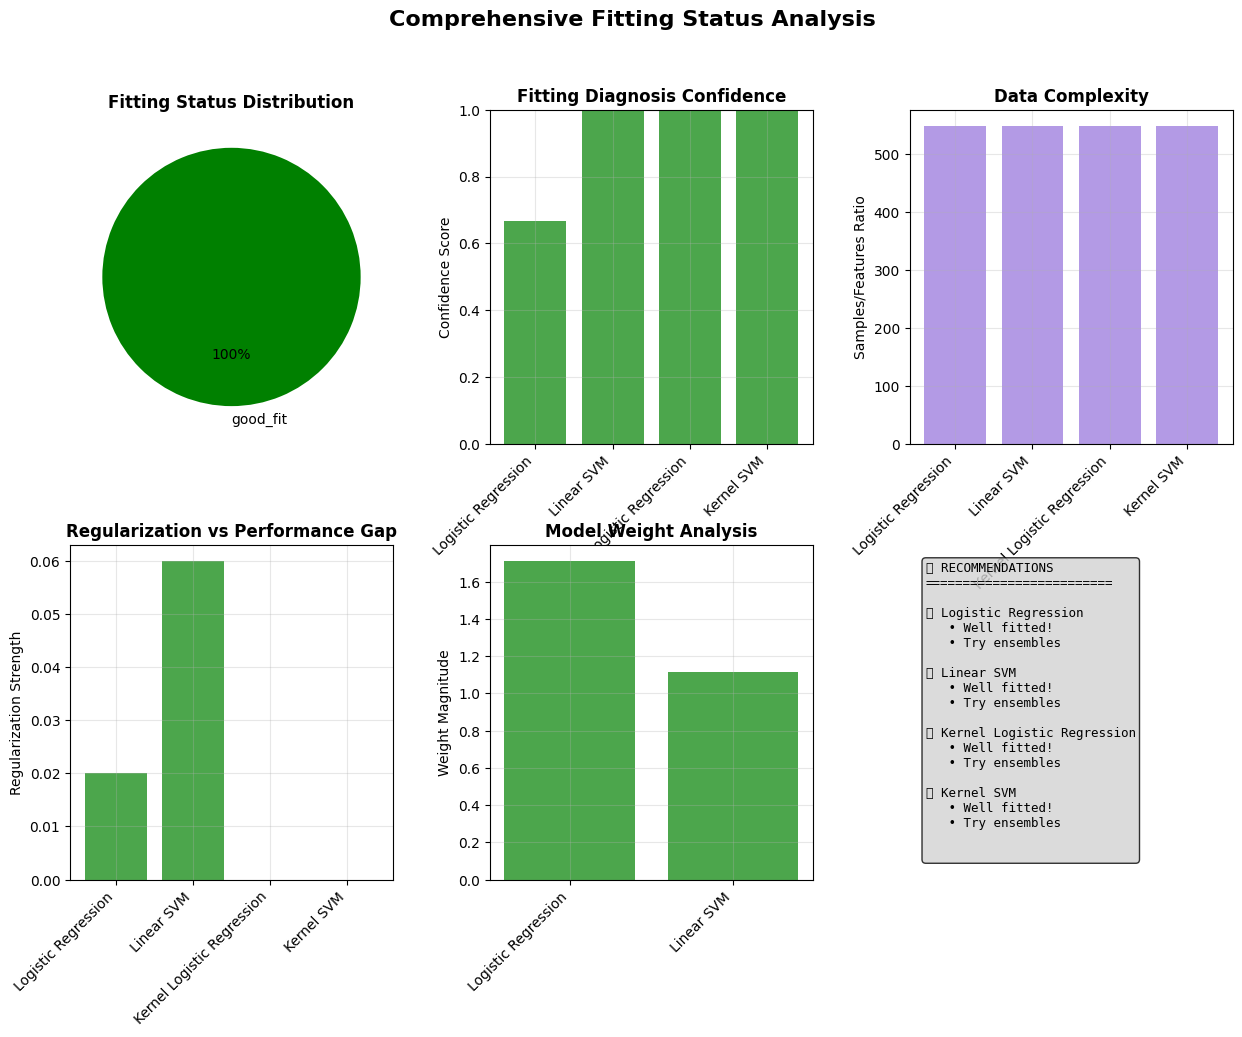

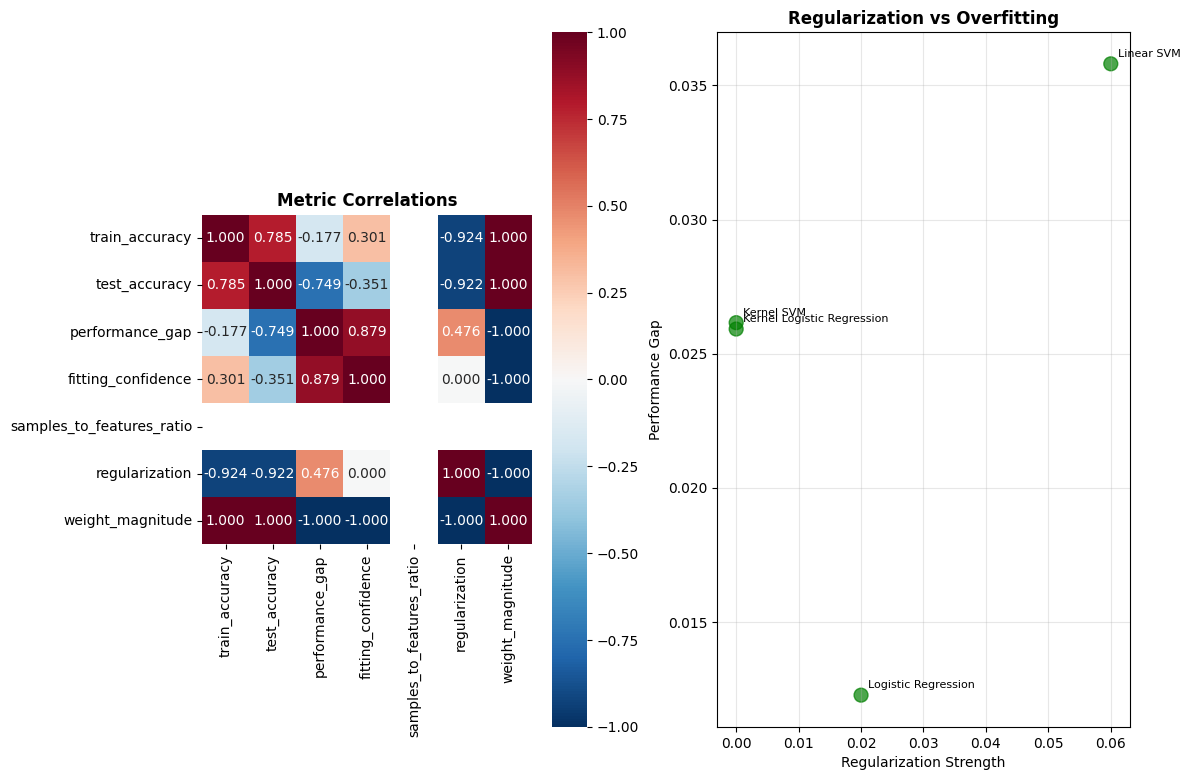

✅ Comprehensive visualization complete!

📋 DETAILED OVERFITTING ANALYSIS REPORT

🔍 DATASET OVERVIEW:
   Total models analyzed: 4
   Average train accuracy: 0.7473
   Average test accuracy: 0.7223
   Average performance gap: 0.0250
   Standard deviation of gaps: 0.0097

🟢 WELL-FITTED MODELS (4):
   • Logistic Regression (Custom): Gap = 0.0123
     Confidence: 0.667
   • Linear SVM (Custom): Gap = 0.0358
     Confidence: 1.000
   • Kernel Logistic Regression (Custom): Gap = 0.0259
     Confidence: 1.000
   • Kernel SVM (Custom): Gap = 0.0262
     Confidence: 1.000

💡 SPECIFIC RECOMMENDATIONS:

   📊 Logistic Regression (Custom):
      Status: GOOD_FIT
      Performance gap: 0.0123
      Recommendations:
        - Model is well-fitted!
        - Consider ensemble methods for improvements
        - Validate on additional datasets

   📊 Linear SVM (Custom):
      Status: GOOD_FIT
      Performance gap: 0.0358
      Recommendations:
        - Model is well-fitted!
        - Consider ensemble 

In [10]:
"""
Overfitting Analysis Visualization Script
Loads CSV data and creates visualizations using the overfitting_analysis module functions
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")


class OverfittingVisualizerFromCSV:
    """
    Visualizer for overfitting analysis data loaded from CSV
    """

    def __init__(self, csv_file="../overfitting_analysis.csv"):
        """
        Initialize with CSV file containing overfitting analysis results

        Args:
            csv_file (str): Path to the CSV file with analysis results
        """
        self.csv_file = csv_file
        self.df = None
        self.load_data()

    def load_data(self):
        """Load and validate CSV data"""
        try:
            self.df = pd.read_csv(self.csv_file)
            print(f"✅ Loaded data from {self.csv_file}")
            print(f"   Models: {len(self.df)}")
            print(f"   Columns: {list(self.df.columns)}")

            # Validate required columns
            required_cols = ['model', 'train_accuracy', 'test_accuracy', 'performance_gap', 'fitting_status']
            missing_cols = [col for col in required_cols if col not in self.df.columns]
            if missing_cols:
                print(f"⚠️ Missing required columns: {missing_cols}")

        except FileNotFoundError:
            print(f"❌ File {self.csv_file} not found")
            self.df = None
        except Exception as e:
            print(f"❌ Error loading CSV: {e}")
            self.df = None

    def print_summary(self):
        """Print summary of the loaded data"""
        if self.df is None:
            print("❌ No data available")
            return

        print("\n📊 OVERFITTING ANALYSIS SUMMARY")
        print("=" * 50)

        # Basic statistics
        print(f"Models analyzed: {len(self.df)}")
        print(f"Average performance gap: {self.df['performance_gap'].mean():.4f}")
        print(f"Max performance gap: {self.df['performance_gap'].max():.4f}")
        print(f"Min performance gap: {self.df['performance_gap'].min():.4f}")

        # Fitting status distribution
        print(f"\nFitting Status Distribution:")
        status_counts = self.df['fitting_status'].value_counts()
        for status, count in status_counts.items():
            percentage = (count / len(self.df)) * 100
            emoji = {
                'overfitting': '🔴',
                'underfitting': '🟡',
                'good_fit': '🟢',
                'inconclusive': '⚪'
            }.get(status, '⚪')
            print(f"   {emoji} {status.replace('_', ' ').title()}: {count} ({percentage:.1f}%)")

        # Model performance summary
        print(f"\nModel Performance:")
        for _, row in self.df.iterrows():
            model_name = row['model'].replace(' (Custom)', '')
            status_emoji = {
                'overfitting': '🔴',
                'underfitting': '🟡',
                'good_fit': '🟢',
                'inconclusive': '⚪'
            }.get(row['fitting_status'], '⚪')

            print(f"   {status_emoji} {model_name}:")
            print(f"      Train: {row['train_accuracy']:.4f}, Test: {row['test_accuracy']:.4f}")
            print(f"      Gap: {row['performance_gap']:.4f}, Status: {row['fitting_status']}")

    def plot_train_vs_test_performance(self, figsize=(12, 8)):
        """Plot train vs test performance comparison"""
        if self.df is None:
            print("❌ No data available")
            return

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

        # Plot 1: Bar chart of train vs test accuracy
        model_names = [name.replace(' (Custom)', '') for name in self.df['model']]
        x = np.arange(len(model_names))
        width = 0.35

        bars1 = ax1.bar(x - width/2, self.df['train_accuracy'], width,
                       label='Train', alpha=0.8, color='lightblue')
        bars2 = ax1.bar(x + width/2, self.df['test_accuracy'], width,
                       label='Test', alpha=0.8, color='lightcoral')

        ax1.set_ylabel('Accuracy')
        ax1.set_title('Train vs Test Performance', fontweight='bold')
        ax1.set_xticks(x)
        ax1.set_xticklabels(model_names, rotation=45, ha='right')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        ax1.set_ylim(0, 1)

        # Add gap annotations
        for i, gap in enumerate(self.df['performance_gap']):
            max_acc = max(self.df.iloc[i]['train_accuracy'], self.df.iloc[i]['test_accuracy'])
            ax1.annotate(f'{gap:.3f}', xy=(i, max_acc + 0.02),
                        ha='center', va='bottom', fontsize=8, fontweight='bold',
                        color='red' if gap > 0.05 else 'green')

        # Plot 2: Performance gaps
        colors = ['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green'
                 for gap in self.df['performance_gap']]
        bars = ax2.bar(range(len(model_names)), self.df['performance_gap'],
                      color=colors, alpha=0.7)

        ax2.set_ylabel('Train - Test Gap')
        ax2.set_title('Overfitting Indicator\n(Performance Gap)', fontweight='bold')
        ax2.set_xticks(range(len(model_names)))
        ax2.set_xticklabels(model_names, rotation=45, ha='right')
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Moderate threshold')
        ax2.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='High threshold')
        ax2.legend()

        # Add value labels
        for bar, gap in zip(bars, self.df['performance_gap']):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{gap:.3f}', ha='center', va='bottom', fontsize=8)

        plt.tight_layout()
        plt.show()

    def plot_fitting_status_analysis(self, figsize=(15, 10)):
        """Plot comprehensive fitting status analysis"""
        if self.df is None:
            print("❌ No data available")
            return

        fig = plt.figure(figsize=figsize)
        gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

        # Plot 1: Fitting Status Distribution (Pie Chart)
        ax1 = fig.add_subplot(gs[0, 0])
        status_counts = self.df['fitting_status'].value_counts()
        colors_map = {'overfitting': 'red', 'underfitting': 'orange',
                     'good_fit': 'green', 'inconclusive': 'gray'}
        pie_colors = [colors_map.get(status, 'gray') for status in status_counts.index]

        wedges, texts, autotexts = ax1.pie(status_counts.values, labels=status_counts.index,
                                          colors=pie_colors, autopct='%1.0f%%',
                                          startangle=90, textprops={'fontsize': 10})
        ax1.set_title('Fitting Status Distribution', fontweight='bold')

        # Plot 2: Confidence Scores
        ax2 = fig.add_subplot(gs[0, 1])
        if 'fitting_confidence' in self.df.columns:
            model_names = [name.replace(' (Custom)', '') for name in self.df['model']]
            colors = [colors_map.get(status, 'gray') for status in self.df['fitting_status']]
            bars = ax2.bar(range(len(model_names)), self.df['fitting_confidence'],
                          color=colors, alpha=0.7)
            ax2.set_ylabel('Confidence Score')
            ax2.set_title('Fitting Diagnosis Confidence', fontweight='bold')
            ax2.set_xticks(range(len(model_names)))
            ax2.set_xticklabels(model_names, rotation=45, ha='right')
            ax2.grid(True, alpha=0.3)
            ax2.set_ylim(0, 1)
        else:
            ax2.text(0.5, 0.5, 'Confidence data not available',
                    ha='center', va='center', transform=ax2.transAxes)

        # Plot 3: Model Complexity Analysis
        ax3 = fig.add_subplot(gs[0, 2])
        if 'samples_to_features_ratio' in self.df.columns:
            model_names = [name.replace(' (Custom)', '') for name in self.df['model']]
            bars = ax3.bar(range(len(model_names)), self.df['samples_to_features_ratio'],
                          color='mediumpurple', alpha=0.7)
            ax3.set_ylabel('Samples/Features Ratio')
            ax3.set_title('Data Complexity', fontweight='bold')
            ax3.set_xticks(range(len(model_names)))
            ax3.set_xticklabels(model_names, rotation=45, ha='right')
            ax3.grid(True, alpha=0.3)
        else:
            ax3.text(0.5, 0.5, 'Complexity data not available',
                    ha='center', va='center', transform=ax3.transAxes)

        # Plot 4: Regularization Analysis
        ax4 = fig.add_subplot(gs[1, 0])
        if 'regularization' in self.df.columns:
            model_names = [name.replace(' (Custom)', '') for name in self.df['model']]
            colors = ['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green'
                     for gap in self.df['performance_gap']]
            bars = ax4.bar(range(len(model_names)), self.df['regularization'],
                          color=colors, alpha=0.7)
            ax4.set_ylabel('Regularization Strength')
            ax4.set_title('Regularization vs Performance Gap', fontweight='bold')
            ax4.set_xticks(range(len(model_names)))
            ax4.set_xticklabels(model_names, rotation=45, ha='right')
            ax4.grid(True, alpha=0.3)
        else:
            ax4.text(0.5, 0.5, 'Regularization data not available',
                    ha='center', va='center', transform=ax4.transAxes)

        # Plot 5: Weight Magnitude Analysis (if available)
        ax5 = fig.add_subplot(gs[1, 1])
        if 'weight_magnitude' in self.df.columns and not self.df['weight_magnitude'].isna().all():
            weight_data = self.df.dropna(subset=['weight_magnitude'])
            model_names_weight = [name.replace(' (Custom)', '') for name in weight_data['model']]
            colors = ['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green'
                     for gap in weight_data['performance_gap']]
            bars = ax5.bar(range(len(model_names_weight)), weight_data['weight_magnitude'],
                          color=colors, alpha=0.7)
            ax5.set_ylabel('Weight Magnitude')
            ax5.set_title('Model Weight Analysis', fontweight='bold')
            ax5.set_xticks(range(len(model_names_weight)))
            ax5.set_xticklabels(model_names_weight, rotation=45, ha='right')
            ax5.grid(True, alpha=0.3)
        else:
            ax5.text(0.5, 0.5, 'Weight magnitude data not available',
                    ha='center', va='center', transform=ax5.transAxes)

        # Plot 6: Recommendations Summary
        ax6 = fig.add_subplot(gs[1, 2])
        ax6.axis('off')

        # Create recommendations text
        recommendations_text = "📋 RECOMMENDATIONS\n" + "=" * 25 + "\n\n"

        for _, row in self.df.iterrows():
            model_name = row['model'].replace(' (Custom)', '')
            status = row['fitting_status']

            status_emoji = {
                'overfitting': '🔴',
                'underfitting': '🟡',
                'good_fit': '🟢',
                'inconclusive': '⚪'
            }.get(status, '⚪')

            recommendations_text += f"{status_emoji} {model_name}\n"

            if status == 'overfitting':
                recommendations_text += "   • Increase regularization\n"
                recommendations_text += "   • Reduce complexity\n"
            elif status == 'underfitting':
                recommendations_text += "   • Decrease regularization\n"
                recommendations_text += "   • Increase complexity\n"
            elif status == 'good_fit':
                recommendations_text += "   • Well fitted!\n"
                recommendations_text += "   • Try ensembles\n"

            recommendations_text += "\n"

        ax6.text(0.05, 0.95, recommendations_text, transform=ax6.transAxes,
                verticalalignment='top', fontfamily='monospace', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

        plt.suptitle('Comprehensive Fitting Status Analysis',
                    fontsize=16, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.show()

    def plot_correlation_analysis(self, figsize=(12, 8)):
        """Plot correlation analysis between different metrics"""
        if self.df is None:
            print("❌ No data available")
            return

        # Select numeric columns for correlation
        numeric_cols = ['train_accuracy', 'test_accuracy', 'performance_gap']
        if 'fitting_confidence' in self.df.columns:
            numeric_cols.append('fitting_confidence')
        if 'samples_to_features_ratio' in self.df.columns:
            numeric_cols.append('samples_to_features_ratio')
        if 'regularization' in self.df.columns:
            numeric_cols.append('regularization')
        if 'weight_magnitude' in self.df.columns:
            numeric_cols.append('weight_magnitude')

        # Create correlation matrix
        corr_data = self.df[numeric_cols].corr()

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

        # Plot 1: Correlation heatmap
        sns.heatmap(corr_data, annot=True, cmap='RdBu_r', center=0,
                   square=True, fmt='.3f', ax=ax1)
        ax1.set_title('Metric Correlations', fontweight='bold')

        # Plot 2: Scatter plot of key relationships
        if len(self.df) > 1:
            # Performance gap vs regularization (if available)
            if 'regularization' in self.df.columns:
                colors = [{'overfitting': 'red', 'underfitting': 'orange',
                          'good_fit': 'green', 'inconclusive': 'gray'}.get(status, 'gray')
                         for status in self.df['fitting_status']]

                ax2.scatter(self.df['regularization'], self.df['performance_gap'],
                           c=colors, alpha=0.7, s=100)
                ax2.set_xlabel('Regularization Strength')
                ax2.set_ylabel('Performance Gap')
                ax2.set_title('Regularization vs Overfitting', fontweight='bold')
                ax2.grid(True, alpha=0.3)

                # Add model labels
                for i, model in enumerate(self.df['model']):
                    ax2.annotate(model.replace(' (Custom)', ''),
                               (self.df.iloc[i]['regularization'], self.df.iloc[i]['performance_gap']),
                               xytext=(5, 5), textcoords='offset points', fontsize=8)
            else:
                ax2.text(0.5, 0.5, 'Regularization data not available for scatter plot',
                        ha='center', va='center', transform=ax2.transAxes)

        plt.tight_layout()
        plt.show()

    def create_comprehensive_visualization(self, figsize=(20, 15)):
        """Create all visualizations in one comprehensive plot"""
        if self.df is None:
            print("❌ No data available")
            return

        print("🎨 Creating comprehensive overfitting analysis visualization...")

        # Plot all analyses
        self.plot_train_vs_test_performance()
        self.plot_fitting_status_analysis()
        self.plot_correlation_analysis()

        print("✅ Comprehensive visualization complete!")

    def generate_detailed_report(self):
        """Generate detailed analysis report"""
        if self.df is None:
            print("❌ No data available")
            return

        print("\n📋 DETAILED OVERFITTING ANALYSIS REPORT")
        print("=" * 60)

        # Overall statistics
        print(f"\n🔍 DATASET OVERVIEW:")
        print(f"   Total models analyzed: {len(self.df)}")
        print(f"   Average train accuracy: {self.df['train_accuracy'].mean():.4f}")
        print(f"   Average test accuracy: {self.df['test_accuracy'].mean():.4f}")
        print(f"   Average performance gap: {self.df['performance_gap'].mean():.4f}")
        print(f"   Standard deviation of gaps: {self.df['performance_gap'].std():.4f}")

        # Identify problematic models
        overfitting_models = self.df[self.df['fitting_status'] == 'overfitting']
        underfitting_models = self.df[self.df['fitting_status'] == 'underfitting']
        good_fit_models = self.df[self.df['fitting_status'] == 'good_fit']

        if len(overfitting_models) > 0:
            print(f"\n🔴 OVERFITTING MODELS ({len(overfitting_models)}):")
            for _, model in overfitting_models.iterrows():
                print(f"   • {model['model']}: Gap = {model['performance_gap']:.4f}")
                if 'fitting_confidence' in model:
                    print(f"     Confidence: {model['fitting_confidence']:.3f}")

        if len(underfitting_models) > 0:
            print(f"\n🟡 UNDERFITTING MODELS ({len(underfitting_models)}):")
            for _, model in underfitting_models.iterrows():
                print(f"   • {model['model']}: Test Acc = {model['test_accuracy']:.4f}")
                if 'fitting_confidence' in model:
                    print(f"     Confidence: {model['fitting_confidence']:.3f}")

        if len(good_fit_models) > 0:
            print(f"\n🟢 WELL-FITTED MODELS ({len(good_fit_models)}):")
            for _, model in good_fit_models.iterrows():
                print(f"   • {model['model']}: Gap = {model['performance_gap']:.4f}")
                if 'fitting_confidence' in model:
                    print(f"     Confidence: {model['fitting_confidence']:.3f}")

        # Model-specific recommendations
        print(f"\n💡 SPECIFIC RECOMMENDATIONS:")
        for _, row in self.df.iterrows():
            model_name = row['model']
            status = row['fitting_status']
            gap = row['performance_gap']

            print(f"\n   📊 {model_name}:")
            print(f"      Status: {status.upper()}")
            print(f"      Performance gap: {gap:.4f}")

            if status == 'overfitting':
                print("      Recommendations:")
                print("        - Increase regularization parameter")
                print("        - Consider collecting more training data")
                print("        - Try early stopping techniques")
                print("        - Reduce model complexity if possible")

            elif status == 'underfitting':
                print("      Recommendations:")
                print("        - Decrease regularization parameter")
                print("        - Increase model complexity")
                print("        - Train for more epochs")
                print("        - Consider feature engineering")

            elif status == 'good_fit':
                print("      Recommendations:")
                print("        - Model is well-fitted!")
                print("        - Consider ensemble methods for improvements")
                print("        - Validate on additional datasets")

        print(f"\n🎯 FINAL INSIGHTS:")
        high_gap_count = len(self.df[self.df['performance_gap'] > 0.1])
        if high_gap_count > 0:
            print(f"   ⚠️ {high_gap_count} models show significant overfitting (gap > 0.1)")
            print("     → Consider overall increase in regularization")

        low_acc_count = len(self.df[self.df['test_accuracy'] < 0.7])
        if low_acc_count > 0:
            print(f"   📈 {low_acc_count} models have low test accuracy (< 0.7)")
            print("     → Consider feature engineering or model complexity increases")

        if 'regularization' in self.df.columns:
            avg_reg = self.df['regularization'].mean()
            print(f"   🔧 Average regularization strength: {avg_reg:.4f}")

        print(f"\n✅ Analysis complete!")


def overf():
    """Main function to run the visualization"""
    print("🎨 OVERFITTING ANALYSIS VISUALIZATION")
    print("=" * 50)

    # Initialize visualizer
    visualizer = OverfittingVisualizerFromCSV("../overfitting_analysis.csv")

    if visualizer.df is None:
        print("❌ Could not load data. Please check the CSV file.")
        return

    # Print summary
    visualizer.print_summary()

    # Generate visualizations
    print("\n🎨 Generating visualizations...")
    visualizer.create_comprehensive_visualization()

    # Generate detailed report
    visualizer.generate_detailed_report()

    print("\n🎉 Visualization complete!")

overf()